# ***Analyse exploratoire des données***

Importer les bibliothèques et afficher toutes les colonnes

In [1]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Afficher toutes les colonnes dans les sorties du notebook
pd.set_option('display.max_columns', None)


Chargement des données

In [2]:
# Chargement des données
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_randomn = pd.read_csv('y_random.csv')

# Exploration des données
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("y_randomn Shape:", y_randomn.shape)


X_train Shape: (10605, 10)
y_train Shape: (10605, 2)
X_test Shape: (4942, 10)
y_randomn Shape: (4942, 2)


Vérification des valeurs manquantes

In [3]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes dans X_train :\n", X_train.isnull().sum())
print("\nValeurs manquantes dans y_train :\n", y_train.isnull().sum())



Valeurs manquantes dans X_train :
 DELIVERY_START                      0
load_forecast                    1287
coal_power_available                1
gas_power_available                 1
nucelear_power_available            1
wind_power_forecasts_average       24
solar_power_forecasts_average      24
wind_power_forecasts_std           24
solar_power_forecasts_std          24
predicted_spot_price             8759
dtype: int64

Valeurs manquantes dans y_train :
 DELIVERY_START    0
spot_id_delta     0
dtype: int64


In [4]:
print(f"Le nombre de lignes dans X_train est : {X_train.shape[0]}")


Le nombre de lignes dans X_train est : 10605


Colonne predicted_spot_price :Il y a un grand nombre de valeurs manquantes (8759), la colonne n'est pas utile pour la modélisation, nous pourrions la supprimer.

Remplacement par la médiane ou la moyenne (pour les valeurs manquantes des autres colonnes numériques).

In [ ]:
# Vérification des formes après suppression
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("y_randomn Shape:", y_randomn.shape)

X_train Shape: (10605, 10)
y_train Shape: (10605, 2)
X_test Shape: (4942, 10)
y_randomn Shape: (4942, 2)


In [7]:
# Conversion de 'DELIVERY_START' en DateTime avec gestion du fuseau horaire
X_train['DELIVERY_START'] = pd.to_datetime(X_train['DELIVERY_START'], utc=True).dt.tz_convert('Europe/Paris')
X_test['DELIVERY_START'] = pd.to_datetime(X_test['DELIVERY_START'], utc=True).dt.tz_convert('Europe/Paris')

# Vérifiez s'il y a des valeurs non converties
print("Valeurs NaT dans X_train['DELIVERY_START'] :", X_train['DELIVERY_START'].isna().sum())
print("Valeurs NaT dans X_test['DELIVERY_START'] :", X_test['DELIVERY_START'].isna().sum())

# Ajout des caractéristiques temporelles
X_train['hour'] = X_train['DELIVERY_START'].dt.hour
X_train['day_of_week'] = X_train['DELIVERY_START'].dt.dayofweek
X_train['month'] = X_train['DELIVERY_START'].dt.month

X_test['hour'] = X_test['DELIVERY_START'].dt.hour
X_test['day_of_week'] = X_test['DELIVERY_START'].dt.dayofweek
X_test['month'] = X_test['DELIVERY_START'].dt.month

# Suppression de 'DELIVERY_START' après l'ajout des caractéristiques
X_train = X_train.drop(columns=['DELIVERY_START'])
X_test = X_test.drop(columns=['DELIVERY_START'])

# Vérification des formes après ajout des caractéristiques temporelles
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("y_randomn Shape:", y_randomn.shape)

Valeurs NaT dans X_train['DELIVERY_START'] : 0
Valeurs NaT dans X_test['DELIVERY_START'] : 0
X_train Shape: (10605, 12)
y_train Shape: (10605, 2)
X_test Shape: (4942, 12)
y_randomn Shape: (4942, 2)


In [8]:
# Remplacer les valeurs manquantes des colonnes avec peu de valeurs manquantes par la médiane
X_train['load_forecast'].fillna(X_train['load_forecast'].median(), inplace=True)
X_train['coal_power_available'].fillna(X_train['coal_power_available'].median(), inplace=True)
X_train['gas_power_available'].fillna(X_train['gas_power_available'].median(), inplace=True)
X_train['nucelear_power_available'].fillna(X_train['nucelear_power_available'].median(), inplace=True)
X_train['wind_power_forecasts_average'].fillna(X_train['wind_power_forecasts_average'].median(), inplace=True)
X_train['solar_power_forecasts_average'].fillna(X_train['solar_power_forecasts_average'].median(), inplace=True)
X_train['wind_power_forecasts_std'].fillna(X_train['wind_power_forecasts_std'].median(), inplace=True)
X_train['solar_power_forecasts_std'].fillna(X_train['solar_power_forecasts_std'].median(), inplace=True)

# Suppression de la colonne 'predicted_spot_price' (trop de valeurs manquantes, non utilisable dans ce cas)
X_train = X_train.drop(columns=['predicted_spot_price'])  
X_test = X_test.drop(columns=['predicted_spot_price'])


C:\Users\yassi\AppData\Local\Temp\ipykernel_16896\2743428266.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['load_forecast'].fillna(X_train['load_forecast'].median(), inplace=True)
C:\Users\yassi\AppData\Local\Temp\ipykernel_16896\2743428266.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [9]:
# Vérification finale des valeurs manquantes
print("Valeurs manquantes après nettoyage dans X_train :\n", X_train.isnull().sum())

Valeurs manquantes après nettoyage dans X_train :
 load_forecast                    0
coal_power_available             0
gas_power_available              0
nucelear_power_available         0
wind_power_forecasts_average     0
solar_power_forecasts_average    0
wind_power_forecasts_std         0
solar_power_forecasts_std        0
hour                             0
day_of_week                      0
month                            0
dtype: int64


In [10]:
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)

X_train Shape: (10605, 11)
X_test Shape: (4942, 11)


Analyse des statistiques descriptives des variables de X_train

In [11]:
# Analyse des distributions des variables de X_train
X_train.describe()


,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,hour,day_of_week,month
count,10605.000000,10605.000000,10605.000000,10605.000000,10605.000000,10605.000000,10605.000000,10605.000000,10605.000000,10605.00000,10605.000000
mean,53497.085431,2819.780292,11463.222914,35393.006601,4510.287317,1915.275059,125.311843,24.948750,11.516549,2.98199,5.655540
std,10585.702085,495.080260,483.776396,7619.513741,3346.107926,2705.206645,132.016049,43.047308,6.920593,2.01043,3.616763
min,30515.000000,1646.000000,9769.000000,22285.000000,592.000000,0.000000,1.830211,0.000000,0.000000,0.00000,1.000000
25%,46251.000000,2226.000000,11140.000000,29005.000000,2039.000000,0.000000,46.924483,0.000000,6.000000,1.00000,2.000000
50%,51846.000000,2806.000000,11487.000000,32470.000000,3319.000000,149.000000,86.700163,3.507229,12.000000,3.00000,5.000000
75%,60573.000000,3386.000000,11945.000000,43055.000000,5944.000000,3497.000000,155.062975,35.028653,18.000000,5.00000,9.000000
max,85145.000000,3391.000000,11963.000000,50122.000000,15167.000000,10127.000000,1871.571992,745.261316,23.000000,6.00000,12.000000


In [12]:
# Affichage de quelques colonnes pour visualiser les premières lignes
X_train.head()

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,hour,day_of_week,month
0,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.0,2,5,1
1,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.0,3,5,1
2,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.0,4,5,1
3,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.0,5,5,1
4,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.0,6,5,1


In [13]:
# Affichage de quelques colonnes pour visualiser les premières lignes
y_train.head()

,DELIVERY_START,spot_id_delta
0,2022-01-01 02:00:00+01:00,-36.874770
1,2022-01-01 03:00:00+01:00,-12.643588
2,2022-01-01 04:00:00+01:00,-1.950193
3,2022-01-01 05:00:00+01:00,1.938272
4,2022-01-01 06:00:00+01:00,0.199907


Visualisation des distributions des variables importantes

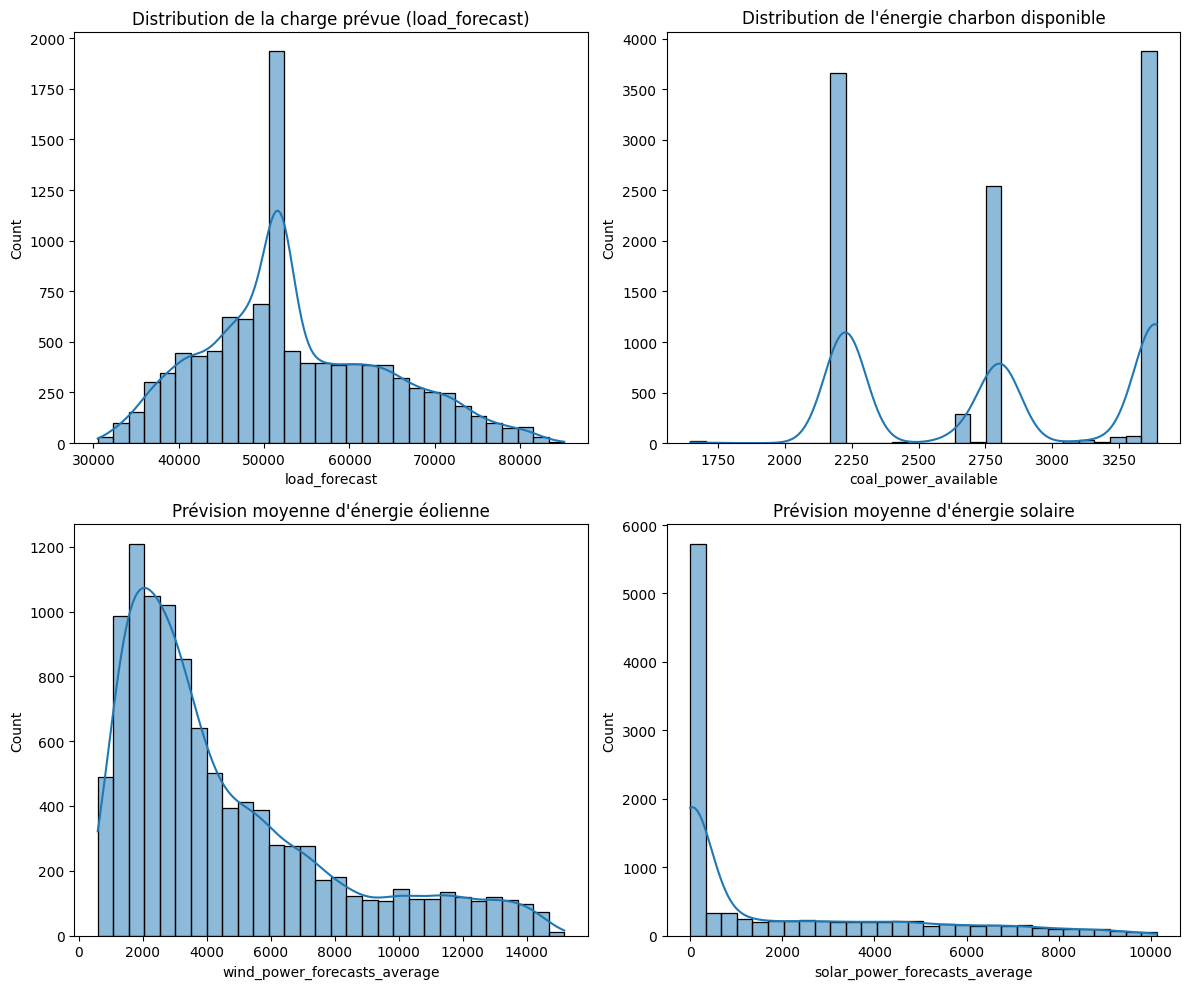

In [14]:
# Affichage des distributions pour quelques variables importantes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(X_train['load_forecast'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution de la charge prévue (load_forecast)')

sns.histplot(X_train['coal_power_available'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution de l\'énergie charbon disponible')

sns.histplot(X_train['wind_power_forecasts_average'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Prévision moyenne d\'énergie éolienne')

sns.histplot(X_train['solar_power_forecasts_average'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Prévision moyenne d\'énergie solaire')

plt.tight_layout()
plt.show()

 Analyse des corrélations

Ajoutant la colonne spot_id_delta à X_train en utilisant l'indice, afin de realiser la matrice de coorelation , et trouver la variable cle, dans ce analyse.

In [15]:
# Créer une nouvelle variable X_train_full qui inclut la variable cible 'spot_id_delta'
X_train_full = X_train.copy()  # Copie du dataframe original
X_train_full['spot_id_delta'] = y_train['spot_id_delta'].values

# Vérification de la nouvelle structure
print(X_train_full.head())




   load_forecast  coal_power_available  gas_power_available  \
0        49439.0                3386.0              11487.0   
1        46511.0                3386.0              11487.0   
2        45158.0                3386.0              11487.0   
3        44779.0                3386.0              11487.0   
4        45284.0                3386.0              11487.0   

   nucelear_power_available  wind_power_forecasts_average  \
0                   44118.0                        3035.0   
1                   44118.0                        3143.0   
2                   44118.0                        3288.0   
3                   44118.0                        3447.0   
4                   44118.0                        3679.0   

   solar_power_forecasts_average  wind_power_forecasts_std  \
0                            0.0                 79.248348   
1                            0.0                 61.776532   
2                            0.0                 44.291112   
3     

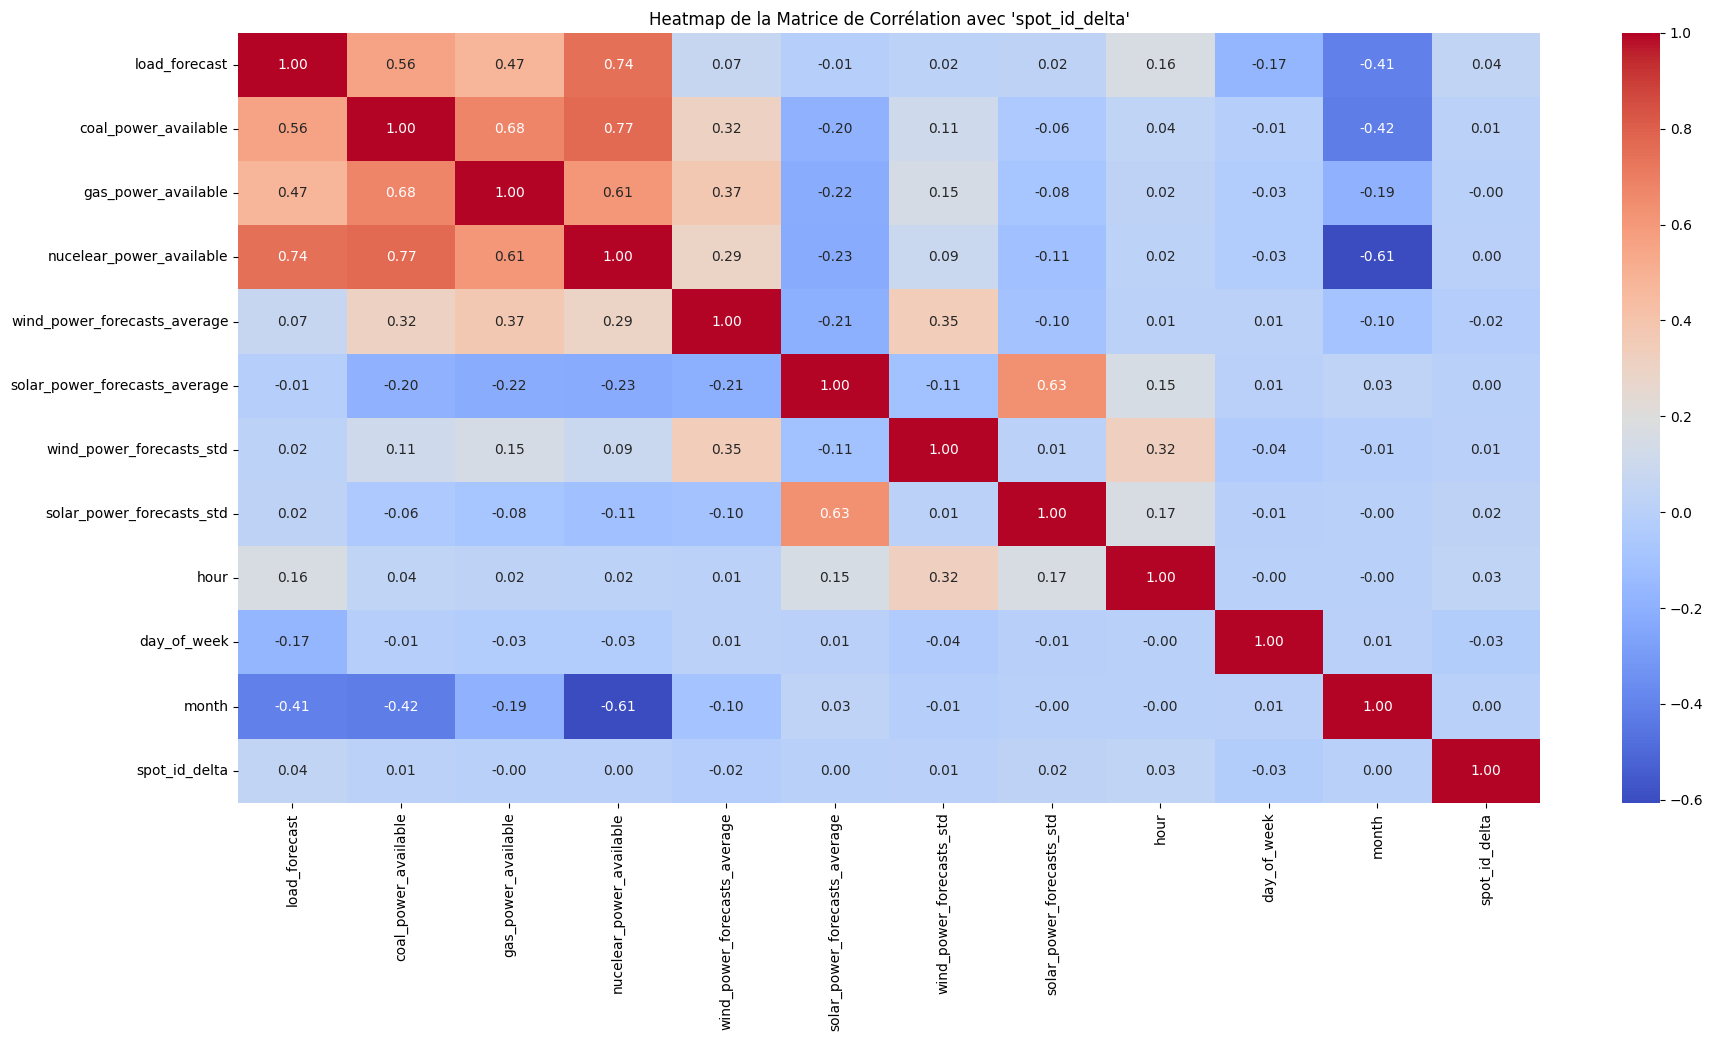

In [16]:

# Calcul de la matrice de corrélation avec les données complètes
correlation_matrix = X_train_full.corr()

# Création de la heatmap de corrélation
plt.figure(figsize=(21, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap de la Matrice de Corrélation avec 'spot_id_delta'")
plt.show()


### Corrélation faible avec `spot_id_delta`

Les variables dans le dataset montrent une très faible corrélation avec la variable cible `spot_id_delta`. Cela signifie qu’aucune variable explicative n’a une relation linéaire forte avec cette cible. La corrélation la plus élevée est proche de zéro, ce qui peut compliquer la prédiction de `spot_id_delta`, surtout avec des méthodes basées sur des relations linéaires.

### Corrélations internes élevées entre certaines variables

- **`load_forecast`** est fortement corrélée avec **`nuclear_power_available`** (0.74). Cela indique qu’une hausse de la demande en charge est souvent accompagnée d’une plus grande disponibilité de l’énergie nucléaire.
- **`coal_power_available`** et **`gas_power_available`** présentent une corrélation modérée (0.68), ce qui reflète une certaine interdépendance entre ces deux sources d’énergie.
- Les prévisions moyennes de puissance solaire (**`solar_power_forecasts_average`**) sont significativement corrélées avec leurs écarts types (**`solar_power_forecasts_std`**) à 0.63. Cela pourrait signifier que lorsque les prévisions solaires augmentent, leur incertitude augmente également.


### Conséquences possibles pour la modélisation

- **Nécessité de modèles non linéaires** : La faible corrélation entre les variables explicatives et la variable cible `spot_id_delta` indique qu’un modèle linéaire risque de ne pas suffire pour représenter les relations complexes.


Préparation des données

### Préparation des données

- Transformation de `spot_id_delta` en variable binaire pour un problème de classification.  
- Division des données : 80% pour l'entraînement, 20% pour la validation.  
- Normalisation des données avec `StandardScaler` pour uniformiser les échelles.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Utiliser directement y_train pour la variable cible
y = (y_train['spot_id_delta'] > 0).astype(int)  # Transformer en problème de classification (signe de spot_id_delta)

# Division en ensembles d'entraînement et de validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)

# Affichage des tailles des ensembles
print("Taille de l'ensemble d'entraînement:", X_train_scaled.shape)
print("Taille de l'ensemble de validation:", X_val_scaled.shape)


Taille de l'ensemble d'entraînement: (8484, 11)
Taille de l'ensemble de validation: (2121, 11)


Test d'Entraînement avec un modèle de régression logistique

Évaluation du modèle de régression logistique :
              precision    recall  f1-score   support

           0       0.51      0.54      0.52      1041
           1       0.53      0.51      0.52      1080

    accuracy                           0.52      2121
   macro avg       0.52      0.52      0.52      2121
weighted avg       0.52      0.52      0.52      2121

Matrice de confusion :



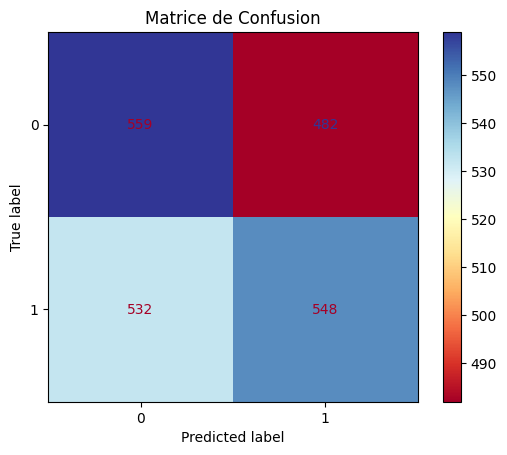

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialisation du modèle de régression logistique
logistic_model = LogisticRegression(random_state=42)

# Entraînement du modèle
logistic_model.fit(X_train_scaled, y_train_split)

# Prédiction sur l'ensemble de validation
y_pred = logistic_model.predict(X_val_scaled)

# Évaluation du modèle
print("Évaluation du modèle de régression logistique :")
print(classification_report(y_val_split, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_val_split, y_pred)
print("Matrice de confusion :\n")

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="RdYlBu")
plt.title('Matrice de Confusion')
plt.show()






Forêt Aléatoire

Évaluation du modèle de Forêt Aléatoire :
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1041
           1       0.82      0.81      0.82      1080

    accuracy                           0.81      2121
   macro avg       0.81      0.81      0.81      2121
weighted avg       0.81      0.81      0.81      2121

Matrice de confusion :
 [[851 190]
 [206 874]]


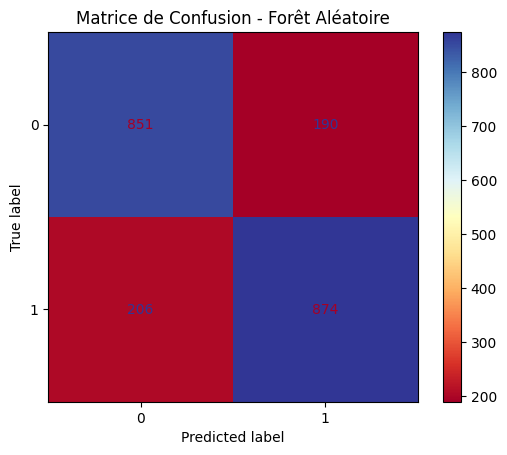

In [20]:
from sklearn.ensemble import RandomForestClassifier


# Initialisation du modèle de Forêt Aléatoire
forest_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Entraînement du modèle
forest_model.fit(X_train_scaled, y_train_split)

# Prédiction sur l'ensemble de validation
y_pred_forest = forest_model.predict(X_val_scaled)

# Évaluation du modèle
print("Évaluation du modèle de Forêt Aléatoire :")
print(classification_report(y_val_split, y_pred_forest))

# Matrice de confusion
conf_matrix_forest = confusion_matrix(y_val_split, y_pred_forest)
print("Matrice de confusion :\n", conf_matrix_forest)

# Afficher la matrice de confusion
disp_forest = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_forest)
disp_forest.plot(cmap="RdYlBu")
plt.title('Matrice de Confusion - Forêt Aléatoire')
plt.show()


**Précision (Precision)** :

- Classe 0 : 76%
- Classe 1 : 78%

La précision indique la proportion de prédictions positives correctes par rapport au total des prédictions positives pour chaque classe.

**Rappel (Recall)** :

- Classe 0 : 78%
- Classe 1 : 76%

Le rappel mesure la proportion de vrais positifs détectés par rapport au total des vrais positifs pour chaque classe.

**F1-Score** :

Le F1-score, qui combine précision et rappel, est de 77% pour les deux classes, ce qui montre un bon équilibre entre la précision et le rappel.

**Exactitude globale (Accuracy)** :

L'exactitude globale est de 77%, ce qui est bien supérieur aux 53% obtenus avec la régression logistique.

Réseau de neurones à 3 couches

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Créer un modèle à 3 couches (entrée, 1 cachée, sortie)
def create_model_3_layers(input_shape):
    model = Sequential()
    # Couche d'entrée avec 64 neurones
    model.add(Dense(64, input_shape=(input_shape,), activation='relu'))
    # Couche cachée
    model.add(Dense(64, activation='relu'))
    # Couche de sortie pour la classification binaire
    model.add(Dense(1, activation='sigmoid'))  # Utilisation de sigmoid pour la classification binaire
    return model

# Initialiser le modèle
model_3_layers = create_model_3_layers(X_train_scaled.shape[1])

# Compiler le modèle avec la fonction de coût 'binary_crossentropy' et l'optimiseur RMSprop
model_3_layers.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history_3_layers = model_3_layers.fit(X_train_scaled, y_train_split, epochs=50, validation_data=(X_val_scaled, y_val_split), batch_size=32)

# Afficher le résumé du modèle
model_3_layers.summary()


c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5140 - loss: 0.6942 - val_accuracy: 0.5601 - val_loss: 0.6848
Epoch 2/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.5763 - loss: 0.6769 - val_accuracy: 0.5710 - val_loss: 0.6767
Epoch 3/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.5932 - loss: 0.6719 - val_accuracy: 0.5903 - val_loss: 0.6701
Epoch 4/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.5892 - loss: 0.6684 - val_accuracy: 0.5823 - val_loss: 0.6720
Epoch 5/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.6019 - loss: 0.6607 - val_accuracy: 0.6063 - val_loss: 0.6639
Epoch 6/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.6209 - loss: 0.6508 - val_accuracy: 0.6162 - val_loss: 0.6573
Epoch 7/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.6267 - loss: 0.6436 - val_accuracy: 0.6148 - val_loss: 0.6590
Epoch 8/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.6293 - loss: 0.6409 - va

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,981 (58.52 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,988 (39.02 KB)

Courbes d'apprentissage pour les modèles à 3 

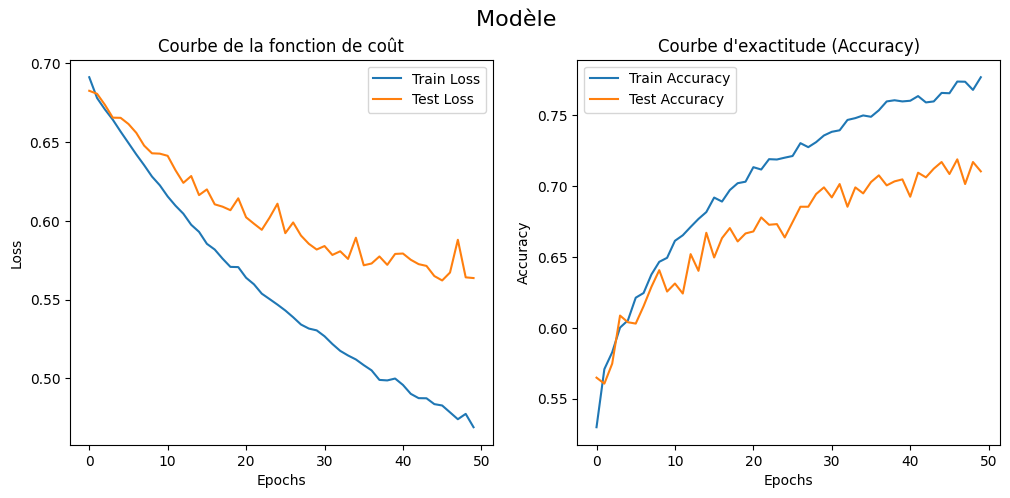

In [22]:
import matplotlib.pyplot as plt

# Fonction pour afficher les courbes d'apprentissage (loss et accuracy)
def plot_history(history, title="Courbe d'apprentissage"):
    plt.figure(figsize=(12, 5))

    # Loss (perte)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('Courbe de la fonction de coût')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy (exactitude)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title('Courbe d\'exactitude (Accuracy)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.suptitle(title, fontsize=16)
    plt.show()

# Affichage des courbes d'apprentissage pour le modèle 
plot_history(history_3_layers, title="Modèle ")


Prédictions, rapport de classification et matrice de confusion:

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step
Rapport de classification pour le modèle à 3 couches :
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      1041
           1       0.70      0.75      0.73      1080

    accuracy                           0.71      2121
   macro avg       0.71      0.71      0.71      2121
weighted avg       0.71      0.71      0.71      2121

Matrice de confusion pour le modèle à 3 couches :
[[693 348]
 [266 814]]


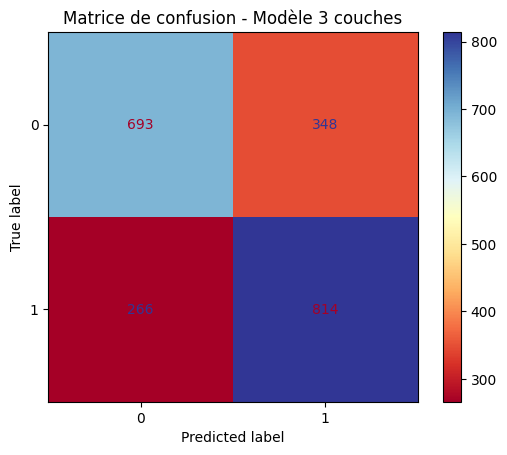

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Prédictions sur l'ensemble de validation
y_pred_3_layers = model_3_layers.predict(X_val_scaled)
y_pred_classes_3_layers = (y_pred_3_layers > 0.5).astype(int).flatten()  # Conversion en classes binaires

# Rapport de classification pour le modèle à 3 couches
print("Rapport de classification pour le modèle à 3 couches :")
print(classification_report(y_val_split, y_pred_classes_3_layers))

# Matrice de confusion pour le modèle à 3 couches
confmat_3_layers = confusion_matrix(y_val_split, y_pred_classes_3_layers)
print("Matrice de confusion pour le modèle à 3 couches :")
print(confmat_3_layers)

# Affichage de la matrice de confusion
disp_3_layers = ConfusionMatrixDisplay(confusion_matrix=confmat_3_layers)
disp_3_layers.plot(cmap="RdYlBu")
plt.title("Matrice de confusion - Modèle 3 couches")
plt.show()


### Analyse des résultats du modèle à 3 couches

- **Courbes d'apprentissage** :  
  Les courbes montrent une diminution constante de la **fonction de coût** avec les époques, ce qui indique que le modèle apprend bien les données. L'**accuracy** pour l'entraînement et la validation augmente également, mais semble se stabiliser à la fin, ce qui peut refléter une limite dans la capacité d'apprentissage du modèle actuel.

- **Matrice de confusion** :  
  Le modèle a correctement prédit **693** exemples négatifs (classe 0) et **814** exemples positifs (classe 1). Cependant, il a mal classé **348** cas négatifs et **266** cas positifs. Ces résultats montrent que le modèle est un peu meilleur pour identifier les cas positifs (classe 1).

- **Rapport de classification** :  
  L'**accuracy globale** est de **71%**, ce qui est correct pour un modèle simple. Les scores de **précision** et de **rappel** sont équilibrés pour les deux classes, avec un **score F1** d'environ **0.71**, montrant une bonne balance entre la précision et le rappel.

==> ce modèle donne des résultats raisonnables pour une classification binaire. Cependant, pour améliorer ses performances, on pourrait explorer des differnts parametres ou architectures plus complexes.


**Test des Differents Modeles et Parametres Avec dropout, et Modele plus Complexe**

**Avec Adam**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

def create_optimized_model(input_shape, learning_rate):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    from tensorflow.keras.optimizers import Adam

    model = Sequential()
    model.add(Dense(128, input_shape=(input_shape,), activation='relu'))
    model.add(Dropout(0.3))  # Dropout pour éviter le sur-apprentissage
    for _ in range(3):  # Ajouter 3 couches cachées supplémentaires
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Couche de sortie

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Tester plusieurs taux d'apprentissage
learning_rates = [0.0001, 0.0003, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2 ,0.3]
epochs = 100
batch_size = 32

for lr in learning_rates:
    print(f"\nTest du modèle avec un taux d'apprentissage de {lr}")
    model = create_optimized_model(X_train_scaled.shape[1], learning_rate=lr)
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        X_train_scaled, y_train_split,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val_scaled, y_val_split),
        callbacks=[early_stop],
        verbose=1
    )
    # Évaluer le modèle
    loss, accuracy = model.evaluate(X_val_scaled, y_val_split)
    print(f"Taux d'apprentissage {lr} - Validation Accuracy: {accuracy:.4f}")



Test du modèle avec un taux d'apprentissage de 0.0001
Epoch 1/100


c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4975 - loss: 0.6975 - val_accuracy: 0.4941 - val_loss: 0.6930
Epoch 2/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5136 - loss: 0.6959 - val_accuracy: 0.5219 - val_loss: 0.6922
Epoch 3/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5001 - loss: 0.6954 - val_accuracy: 0.5182 - val_loss: 0.6920
Epoch 4/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5219 - loss: 0.6922 - val_accuracy: 0.5304 - val_loss: 0.6913
Epoch 5/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.5168 - loss: 0.6945 - val_accuracy: 0.5361 - val_loss: 0.6909
Epoch 6/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.5142 - loss: 0.6926 - val_accuracy: 0.5351 - val_loss: 0.6904
Epoch 7/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5198 - loss: 0.6913 - val_accuracy: 0.5304 - val_loss: 0.6898
Epoch 8/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5137 - loss: 0.6932 - val_accuracy: 0.

**Avec RMsprop**

In [47]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop  # Importer RMSprop

def create_optimized_model(input_shape, learning_rate):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout

    model = Sequential()
    model.add(Dense(128, input_shape=(input_shape,), activation='relu'))
    model.add(Dropout(0.3))  # Dropout pour éviter le sur-apprentissage
    for _ in range(3):  # Ajouter 3 couches cachées supplémentaires
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Couche de sortie

    # Utiliser RMSprop à la place d'Adam
    optimizer = RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Tester plusieurs taux d'apprentissage
learning_rates = [0.0001, 0.0003, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2 ,0.3]
epochs = 100
batch_size = 32

for lr in learning_rates:
    print(f"\nTest du modèle avec un taux d'apprentissage de {lr}")
    model = create_optimized_model(X_train_scaled.shape[1], learning_rate=lr)
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        X_train_scaled, y_train_split,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val_scaled, y_val_split),
        callbacks=[early_stop],
        verbose=1
    )
    # Évaluer le modèle
    loss, accuracy = model.evaluate(X_val_scaled, y_val_split)
    print(f"Taux d'apprentissage {lr} - Validation Accuracy: {accuracy:.4f}")



Test du modèle avec un taux d'apprentissage de 0.0001
Epoch 1/100


c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5018 - loss: 0.6993 - val_accuracy: 0.5309 - val_loss: 0.6922
Epoch 2/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5068 - loss: 0.6962 - val_accuracy: 0.5149 - val_loss: 0.6919
Epoch 3/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5119 - loss: 0.6964 - val_accuracy: 0.5314 - val_loss: 0.6909
Epoch 4/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5024 - loss: 0.6956 - val_accuracy: 0.5210 - val_loss: 0.6907
Epoch 5/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5072 - loss: 0.6943 - val_accuracy: 0.5314 - val_loss: 0.6905
Epoch 6/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.5118 - loss: 0.6928 - val_accuracy: 0.5342 - val_loss: 0.6901
Epoch 7/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5301 - loss: 0.6911 - val_accuracy: 0.5309 - val_loss: 0.6896
Epoch 8/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.5197 - loss: 0.6926 - val_accuracy: 0.


### Analyse des taux d'apprentissage testés

### Meilleur taux d'apprentissage
- **Taux** : `0.001`
- **Performance** : 
  - Ce taux donne les **meilleurs résultats** avec une précision de validation (validation accuracy) supérieure.
  - La convergence est **stable** et permet au modèle d'apprendre efficacement sans oscillations.

In [49]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU, ELU

def create_optimized_model(input_shape, learning_rate, activation_function):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout

    model = Sequential()
    if activation_function == 'leaky_relu':
        model.add(Dense(128, input_shape=(input_shape,)))
        model.add(LeakyReLU(alpha=0.01))
    elif activation_function == 'elu':
        model.add(Dense(128, input_shape=(input_shape,), activation='elu'))
    elif activation_function == 'swish':
        from tensorflow.keras.activations import swish
        model.add(Dense(128, input_shape=(input_shape,), activation=swish))
    else:  # ReLU par défaut
        model.add(Dense(128, input_shape=(input_shape,), activation='relu'))

    model.add(Dropout(0.3))
    for _ in range(3):  # Ajouter 3 couches cachées supplémentaires
        model.add(Dense(128))
        if activation_function == 'leaky_relu':
            model.add(LeakyReLU(alpha=0.01))
        elif activation_function == 'elu':
            model.add(ELU(alpha=1.0))
        elif activation_function == 'swish':
            model.add(Dense(128, activation='swish'))
        else:
            model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))  # Couche de sortie

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Définir les fonctions d'activation à tester
activation_functions = ['relu', 'elu', 'leaky_relu', 'swish']
learning_rate = 0.001
epochs = 100
batch_size = 32

for activation in activation_functions:
    print(f"\nTest du modèle avec la fonction d'activation : {activation}")
    model = create_optimized_model(X_train_scaled.shape[1], learning_rate=learning_rate, activation_function=activation)
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(
        X_train_scaled, y_train_split,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val_scaled, y_val_split),
        callbacks=[early_stop],
        verbose=1
    )
    # Évaluer le modèle
    loss, accuracy = model.evaluate(X_val_scaled, y_val_split)
    print(f"Fonction d'activation {activation} - Validation Accuracy: {accuracy:.4f}")



Test du modèle avec la fonction d'activation : relu
Epoch 1/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5024 - loss: 0.7000 - val_accuracy: 0.4941 - val_loss: 0.6944
Epoch 2/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5089 - loss: 0.6952 - val_accuracy: 0.5328 - val_loss: 0.6902
Epoch 3/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5172 - loss: 0.6927 - val_accuracy: 0.5262 - val_loss: 0.6871
Epoch 4/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5361 - loss: 0.6870 - val_accuracy: 0.5134 - val_loss: 0.6903
Epoch 5/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5413 - loss: 0.6883 - val_accuracy: 0.5592 - val_loss: 0.6863
Epoch 6/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5579 - loss: 0.6825 - val_accuracy: 0.5403 - val_loss: 0.6819
Epoch 7/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5546 - loss: 0.6814 - val_accuracy: 0.5554 - val_loss: 0.6819
Epoch 8/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 

**Conclusion :**

La meilleure fonction d'activation dans ce test est **Leaky ReLU** avec une précision de validation de **72.98%**. Elle surpasse les autres grâce à sa capacité à éviter le problème des neurones morts en permettant un faible gradient pour les valeurs négatives. Cela lui confère une convergence plus stable et efficace, adaptée à cette architecture et ces données.

**À partir de maintenant :**

Nous travaillerons avec les paramètres suivants, qui offrent les meilleurs résultats jusqu'à présent :

- **Learning rate** : 0.001 (valeur par défaut)
- **Optimiseur** : Adam
- **Fonction d'activation** : Leaky ReLU

Ces choix sont basés sur leurs performances précédentes, offrant une convergence stable et de bons résultats sur nos données.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam

# Créer un modèle plus complexe 
def create_model_without_dropout(input_shape):
    model = Sequential()
    # Couche d'entrée avec 128 neurones et LeakyReLU
    model.add(Dense(128, input_shape=(input_shape,)))
    model.add(LeakyReLU(alpha=0.01))  # LeakyReLU avec un alpha de 0.01

    for _ in range(5):
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.01))  # LeakyReLU appliqué ici aussi

    # Couche de sortie pour la classification binaire
    model.add(Dense(1, activation='sigmoid'))  # Utilisation de sigmoid pour la classification binaire
    return model

# Initialiser le modèle avec l'architecture plus complexe et du Dropout
model_without_dropout = create_model_without_dropout(X_train_scaled.shape[1])

# Compiler le modèle avec la fonction de coût 'binary_crossentropy' et l'optimiseur Adam
model_without_dropout.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history_without_dropout = model_without_dropout.fit(X_train_scaled, y_train_split, epochs=200, validation_data=(X_val_scaled, y_val_split), batch_size=16)

# Afficher le résumé du modèle
model_without_dropout.summary()


Epoch 1/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5128 - loss: 0.6938 - val_accuracy: 0.5436 - val_loss: 0.6904
Epoch 2/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5474 - loss: 0.6857 - val_accuracy: 0.5653 - val_loss: 0.6796
Epoch 3/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5802 - loss: 0.6718 - val_accuracy: 0.5884 - val_loss: 0.6745
Epoch 4/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 0.6163 - loss: 0.6511 - val_accuracy: 0.6054 - val_loss: 0.6513
Epoch 5/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.6284 - loss: 0.6359 - val_accuracy: 0.6355 - val_loss: 0.6284
Epoch 6/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6550 - loss: 0.6171 - val_accuracy: 0.6483 - val_loss: 0.6251
Epoch 7/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step - accuracy: 0.6698 - loss: 0.5974 - val_accuracy: 0.6747 - val_loss: 0.6041
Epoch 8/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.6941 - loss: 0.5692 - 

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_30 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_31 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_32 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_33 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_34 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_35 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,677 (987.02 KB)

 Trainable params: 84,225 (329.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 168,452 (658.02 KB)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam

# Créer un modèle plus complexe 
def create_model_without_dropout(input_shape):
    model = Sequential()
    # Couche d'entrée avec 128 neurones et LeakyReLU
    model.add(Dense(128, input_shape=(input_shape,)))
    model.add(LeakyReLU(alpha=0.01))  # LeakyReLU avec un alpha de 0.01

    for _ in range(5):
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.01))  # LeakyReLU appliqué ici aussi

    # Couche de sortie pour la classification binaire
    model.add(Dense(1, activation='sigmoid'))  # Utilisation de sigmoid pour la classification binaire
    return model

# Initialiser le modèle avec l'architecture plus complexe et du Dropout
model_without_dropout = create_model_without_dropout(X_train_scaled.shape[1])

# Compiler le modèle avec la fonction de coût 'binary_crossentropy' et l'optimiseur Adam
model_without_dropout.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history_without_dropout = model_without_dropout.fit(X_train_scaled, y_train_split, epochs=200, validation_data=(X_val_scaled, y_val_split), batch_size=16)

# Afficher le résumé du modèle
model_without_dropout.summary()


Epoch 1/200


c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


531/531 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5120 - loss: 0.6928 - val_accuracy: 0.5370 - val_loss: 0.6862
Epoch 2/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5473 - loss: 0.6840 - val_accuracy: 0.5516 - val_loss: 0.6799
Epoch 3/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5962 - loss: 0.6717 - val_accuracy: 0.6139 - val_loss: 0.6548
Epoch 4/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6093 - loss: 0.6572 - val_accuracy: 0.6205 - val_loss: 0.6529
Epoch 5/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6325 - loss: 0.6412 - val_accuracy: 0.6205 - val_loss: 0.6413
Epoch 6/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6451 - loss: 0.6242 - val_accuracy: 0.6554 - val_loss: 0.6221
Epoch 7/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6732 - loss: 0.6021 - val_accuracy: 0.6469 - val_loss: 0.6190
Epoch 8/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6823 - loss: 0.5902 - val_accuracy: 0.6676

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,677 (987.02 KB)

 Trainable params: 84,225 (329.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 168,452 (658.02 KB)

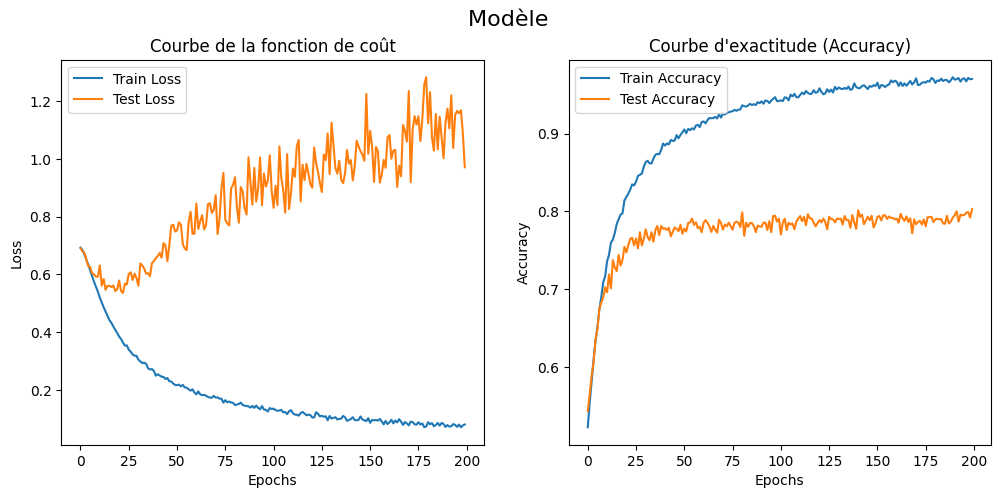

In [29]:
import matplotlib.pyplot as plt

# Fonction pour afficher les courbes d'apprentissage (loss et accuracy)
def plot_history(history, title="Courbe d'apprentissage"):
    plt.figure(figsize=(12, 5))

    # Loss (perte)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('Courbe de la fonction de coût')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy (exactitude)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title('Courbe d\'exactitude (Accuracy)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.suptitle(title, fontsize=16)
    plt.show()

# Affichage des courbes d'apprentissage pour le modèle
plot_history(history_without_dropout, title="Modèle ")


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Rapport de classification pour le modèle plus complexe :
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1041
           1       0.81      0.80      0.81      1080

    accuracy                           0.80      2121
   macro avg       0.80      0.80      0.80      2121
weighted avg       0.80      0.80      0.80      2121

Matrice de confusion pour le modèle plus complexe :


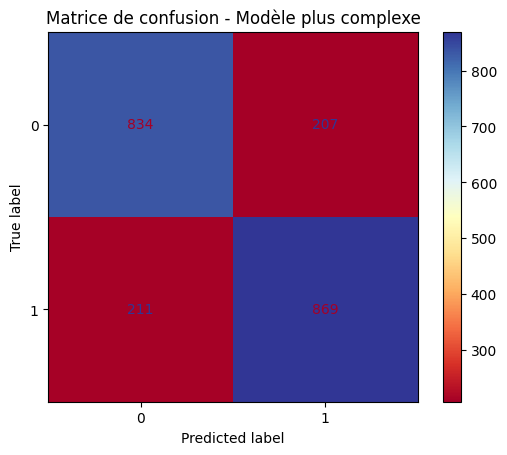

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Prédictions sur l'ensemble de validation pour le modèle plus complexe
y_pred_more_layers = model_without_dropout.predict(X_val_scaled)
y_pred_classes_more_layers = (y_pred_more_layers > 0.5).astype(int).flatten()  # Conversion en classes binaires

# Rapport de classification pour le modèle plus complexe
print("Rapport de classification pour le modèle plus complexe :")
print(classification_report(y_val_split, y_pred_classes_more_layers))

# Matrice de confusion pour le modèle plus complexe
confmat_more_layers = confusion_matrix(y_val_split, y_pred_classes_more_layers)
print("Matrice de confusion pour le modèle plus complexe :")


# Affichage de la matrice de confusion
disp_more_layers = ConfusionMatrixDisplay(confusion_matrix=confmat_more_layers)
disp_more_layers.plot(cmap="RdYlBu")
plt.title("Matrice de confusion - Modèle plus complexe")
plt.show()




#### 1. Performance Générale
- **Accuracy** : 80% sur les données de test, montrant une performance correcte mais avec une marge d'amélioration.
- Le modèle est bien équilibré pour les deux classes (0 et 1).

---

#### 2. Matrice de Confusion
- **Vrais négatifs (Classe 0)** : 834  
- **Faux positifs** : 207  
- **Vrais positifs (Classe 1)** : 869  
- **Faux négatifs** : 211  

> **Erreur totale** : environ 20%, montrant que le modèle peut encore être amélioré.

---

#### 3. Courbes de Performance
- La **perte d'entraînement** diminue bien, mais celle de validation est instable, indiquant un **sur-apprentissage**.
- L'**accuracy d'entraînement** atteint 95%, mais celle de validation plafonne à 80%.

---

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prédictions sur les données de test
y_test_pred = (model_without_dropout.predict(X_test) > 0.5).astype(int)

# Évaluer l'accuracy sur l'ensemble de test
accuracy_test = accuracy_score(y_randomn['spot_id_delta'] > 0, y_test_pred)
print("Accuracy sur les données de test :", accuracy_test)



155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
Accuracy sur les données de test : 0.5781060299473897


### **Validation Croisée à 5 Folds**
Validation croisée à 5 folds pour entraîner un modèle sans Dropout, avec l'optimiseur Adam et une architecture comportant 5 couches cachées activées par LeakyReLU.
Afin d'évaluer la robustesse du modèle tout en réduisant les risques de surapprentissage et de dépendance aux données spécifiques d'entraînement.

In [90]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Réinitialiser les indices de y_train_split pour correspondre à ceux générés par KFold
y_train_split = y_train_split.reset_index(drop=True)

# Configuration de la validation croisée
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Diviser en 5 folds
fold_no = 1
accuracies = []

# Début de la validation croisée
for train_index, val_index in kf.split(X_train_scaled):
    print(f"Fold {fold_no}")
    
    # Diviser les données pour le fold actuel
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train_split.iloc[train_index], y_train_split.iloc[val_index]
    
    # Créer un nouveau modèle pour chaque fold
    model = create_model_without_dropout(X_train_scaled.shape[1])
    
    # Compiler le modèle avant l'entraînement
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    
    # Entraîner le modèle
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=50,  # Vous pouvez augmenter ce nombre si nécessaire
        batch_size=16,
        verbose=1
    )
    
    # Prédictions sur les données de validation
    y_pred = (model.predict(X_val_fold) > 0.5).astype(int)
    
    # Calculer l'accuracy pour ce fold
    acc = accuracy_score(y_val_fold, y_pred)
    accuracies.append(acc)
    print(f"Fold {fold_no} - Accuracy: {acc}")
    
    fold_no += 1

# Résultats finaux
print("Précisions pour chaque fold :", accuracies)
print("Moyenne des précisions sur les 5 folds :", np.mean(accuracies))


Fold 1
Epoch 1/50


c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5155 - loss: 0.6936 - val_accuracy: 0.5068 - val_loss: 0.6911
Epoch 2/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.5415 - loss: 0.6890 - val_accuracy: 0.5575 - val_loss: 0.6808
Epoch 3/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.5748 - loss: 0.6755 - val_accuracy: 0.5563 - val_loss: 0.7246
Epoch 4/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.5925 - loss: 0.6701 - val_accuracy: 0.5757 - val_loss: 0.6770
Epoch 5/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.6085 - loss: 0.6544 - val_accuracy: 0.6058 - val_loss: 0.6517
Epoch 6/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.6350 - loss: 0.6333 - val_accuracy: 0.6075 - val_loss: 0.6457
Epoch 7/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.6435 - loss: 0.6277 - val_accuracy: 0.6270 - val_loss: 0.6634
Epoch 8/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6673 - loss: 0.5917 - val_accuracy: 

c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5068 - loss: 0.6941 - val_accuracy: 0.5268 - val_loss: 0.6886
Epoch 2/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.5403 - loss: 0.6869 - val_accuracy: 0.5392 - val_loss: 0.6819
Epoch 3/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.5741 - loss: 0.6774 - val_accuracy: 0.5622 - val_loss: 0.6818
Epoch 4/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.5810 - loss: 0.6634 - val_accuracy: 0.6093 - val_loss: 0.6643
Epoch 5/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.6119 - loss: 0.6463 - val_accuracy: 0.5916 - val_loss: 0.6579
Epoch 6/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6382 - loss: 0.6293 - val_accuracy: 0.6217 - val_loss: 0.6536
Epoch 7/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.6607 - loss: 0.6142 - val_accuracy: 0.6293 - val_loss: 0.6421
Epoch 8/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6844 - loss: 0.5865 - val_accuracy: 0.6

c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5196 - loss: 0.6928 - val_accuracy: 0.4838 - val_loss: 0.6988
Epoch 2/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5429 - loss: 0.6835 - val_accuracy: 0.5610 - val_loss: 0.6792
Epoch 3/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5646 - loss: 0.6737 - val_accuracy: 0.5704 - val_loss: 0.6749
Epoch 4/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6036 - loss: 0.6569 - val_accuracy: 0.5798 - val_loss: 0.6668
Epoch 5/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6120 - loss: 0.6441 - val_accuracy: 0.6164 - val_loss: 0.6484
Epoch 6/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6311 - loss: 0.6314 - val_accuracy: 0.6211 - val_loss: 0.6521
Epoch 7/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6341 - loss: 0.6225 - val_accuracy: 0.6335 - val_loss: 0.6436
Epoch 8/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6668 - loss: 0.5965 - val_accuracy: 0.6235 - val_

c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4986 - loss: 0.6950 - val_accuracy: 0.5274 - val_loss: 0.6957
Epoch 2/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5370 - loss: 0.6890 - val_accuracy: 0.5333 - val_loss: 0.6906
Epoch 3/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5624 - loss: 0.6791 - val_accuracy: 0.5639 - val_loss: 0.6767
Epoch 4/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5999 - loss: 0.6641 - val_accuracy: 0.5946 - val_loss: 0.6589
Epoch 5/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6089 - loss: 0.6490 - val_accuracy: 0.5934 - val_loss: 0.6496
Epoch 6/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6265 - loss: 0.6369 - val_accuracy: 0.6040 - val_loss: 0.6463
Epoch 7/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6451 - loss: 0.6211 - val_accuracy: 0.6211 - val_loss: 0.6472
Epoch 8/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6580 - loss: 0.6063 - val_accuracy: 0.

c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5081 - loss: 0.6951 - val_accuracy: 0.5165 - val_loss: 0.6892
Epoch 2/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.5343 - loss: 0.6852 - val_accuracy: 0.5342 - val_loss: 0.6831
Epoch 3/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5673 - loss: 0.6734 - val_accuracy: 0.5755 - val_loss: 0.6817
Epoch 4/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6051 - loss: 0.6570 - val_accuracy: 0.5814 - val_loss: 0.6796
Epoch 5/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6108 - loss: 0.6460 - val_accuracy: 0.5979 - val_loss: 0.6697
Epoch 6/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6427 - loss: 0.6214 - val_accuracy: 0.6185 - val_loss: 0.6490
Epoch 7/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6638 - loss: 0.6030 - val_accuracy: 0.6203 - val_loss: 0.6489
Epoch 8/50
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6749 - loss: 0.5869 - val_accuracy: 0.6421 - va

### Validation Croisée (KFold)

- Les données sont divisées en **5 sous-ensembles (folds)**.
- À chaque itération :
  - **4 folds** sont utilisés pour l’entraînement.
  - **1 fold** est utilisé pour la validation.


---


### 2. Résultats par Fold
#### Fold 1
- **Précision** : 0.7560  
- **Interprétation** : Le modèle a bien performé sur cette partition.

#### Fold 2
- **Précision** : 0.7549  
- **Interprétation** : Légèrement inférieure à Fold 1, mais toujours comparable. Cela montre que le modèle est relativement stable.

#### Fold 3
- **Précision** : 0.7478  
- **Interprétation** : Une légère baisse est observée. Cela pourrait être dû à une distribution différente des données dans ce fold.

#### Fold 4
- **Précision** : 0.7448  
- **Interprétation** : Une performance similaire au Fold 3. Cela reste dans une plage acceptable, ce qui indique que le modèle est robuste.

#### Fold 5
- **Précision** : 0.7423  
- **Interprétation** : Le modèle montre des performances légèrement inférieures dans ce fold, ce qui pourrait être lié à des données de validation plus difficiles.

---

### 3. Moyenne des Précisions
- **Moyenne des Précisions** : 0.7492  
- **Interprétation** : La précision moyenne sur les 5 folds est de **74.92%**. Cela indique que le modèle fonctionne de manière stable et cohérente sur différentes partitions des données.


#### Test du Modele avec dropout

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU

# Créer un modèle avec Dropout modéré et LeakyReLU
def create_model_with_moderate_dropout(input_shape):
    model = Sequential()
    # Couche d'entrée avec 128 neurones et LeakyReLU
    model.add(Dense(128, input_shape=(input_shape,)))
    model.add(LeakyReLU(alpha=0.01))  # LeakyReLU
    model.add(Dropout(0.1))  # Dropout 

    # 6 couches cachées supplémentaires, chacune avec 128 neurones et LeakyReLU
    for _ in range(6):
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.01))  # LeakyReLU
        model.add(Dropout(0.1))  # Dropout de 0.1

    # Couche de sortie pour la classification binaire
    model.add(Dense(1, activation='sigmoid'))
    return model

# Initialiser le modèle avec Dropout modéré
model_with_moderate_dropout = create_model_with_moderate_dropout(X_train_scaled.shape[1])

# Compiler le modèle
model_with_moderate_dropout.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle avec 100 époques
history_with_moderate_dropout = model_with_moderate_dropout.fit(
    X_train_scaled, y_train_split, 
    epochs=200, 
    validation_data=(X_val_scaled, y_val_split), 
    batch_size=16
)

# Afficher le résumé du modèle
model_with_moderate_dropout.summary()


Epoch 1/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4918 - loss: 0.6945 - val_accuracy: 0.5266 - val_loss: 0.6894
Epoch 2/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5298 - loss: 0.6878 - val_accuracy: 0.5662 - val_loss: 0.6804
Epoch 3/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5643 - loss: 0.6787 - val_accuracy: 0.5733 - val_loss: 0.6775
Epoch 4/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5857 - loss: 0.6696 - val_accuracy: 0.5653 - val_loss: 0.6896
Epoch 5/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5819 - loss: 0.6679 - val_accuracy: 0.6044 - val_loss: 0.6604
Epoch 6/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6045 - loss: 0.6546 - val_accuracy: 0.6054 - val_loss: 0.6489
Epoch 7/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6195 - loss: 0.6478 - val_accuracy: 0.6030 - val_loss: 0.6558
Epoch 8/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6138 - loss: 0.6443 - val_accu

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_55 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_56 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_57 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_58 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_59 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_60 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_61 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 302,213 (1.15 MB)

 Trainable params: 100,737 (393.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 201,476 (787.02 KB)

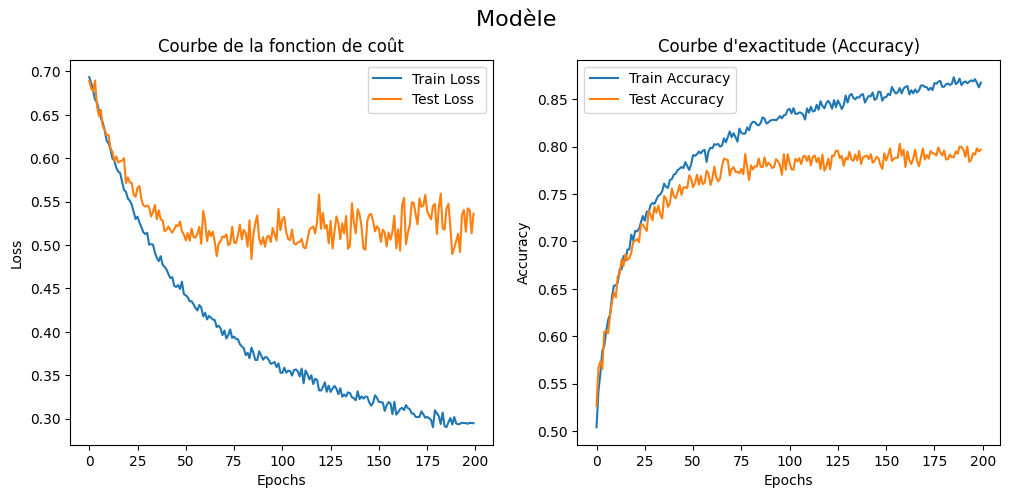

In [36]:
# Affichage des courbes d'apprentissage pour le modèle
plot_history(history_with_moderate_dropout, title="Modèle ")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Rapport de classification pour le modèle plus complexe :
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1041
           1       0.81      0.79      0.80      1080

    accuracy                           0.80      2121
   macro avg       0.80      0.80      0.80      2121
weighted avg       0.80      0.80      0.80      2121

Matrice de confusion pour le modèle plus complexe :


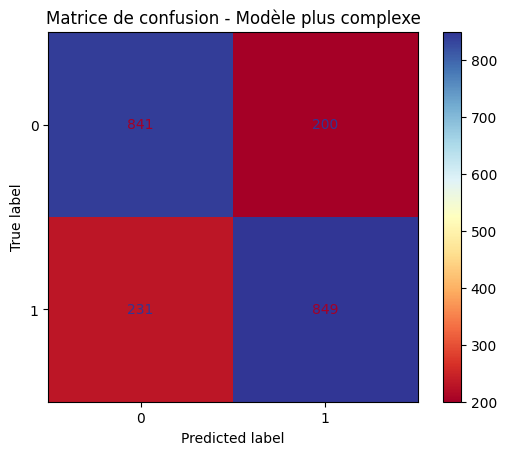

In [37]:
# Prédictions sur l'ensemble de validation pour le modèle plus complexe
y_pred_more_layers = model_with_moderate_dropout.predict(X_val_scaled)
y_pred_classes_more_layers = (y_pred_more_layers > 0.5).astype(int).flatten()  # Conversion en classes binaires

# Rapport de classification pour le modèle plus complexe
print("Rapport de classification pour le modèle plus complexe :")
print(classification_report(y_val_split, y_pred_classes_more_layers))

# Matrice de confusion pour le modèle plus complexe
confmat_more_layers = confusion_matrix(y_val_split, y_pred_classes_more_layers)
print("Matrice de confusion pour le modèle plus complexe :")


# Affichage de la matrice de confusion
disp_more_layers = ConfusionMatrixDisplay(confusion_matrix=confmat_more_layers)
disp_more_layers.plot(cmap="RdYlBu")
plt.title("Matrice de confusion - Modèle plus complexe")
plt.show()


## Analyse du Modèle avec Dropout

### 1. Précision d’Entraînement
- **Précision** : Environ **80%**.  
- **Observation** : Le Dropout ralentit l’apprentissage en désactivant aléatoirement des neurones, ce qui empêche le modèle de trop se spécialiser.

---

### 2. Précision de Validation
- **Précision** : Comparable à celle d’entraînement (~80%).  
- **Interprétation** : Cela montre une **meilleure généralisation**, car le modèle ne surapprend pas aux données d’entraînement.

---

### 3. Courbes d’Erreur et d’Exactitude
- Les courbes d’entraînement et de validation sont **plus proches**, ce qui indique un modèle mieux équilibré.
- **Moins de fluctuations** dans les courbes de validation, signe de **stabilité** et d’un modèle robuste.

---
L’utilisation du Dropout améliore la capacité du modèle à généraliser, avec des performances stables et cohérentes sur les données d’entraînement et de validation.


# Mise en Œuvre de la Technique BatchNormalization

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Créer un modèle avec BatchNormalization
def create_model_with_batchnorm(input_shape):
    model = Sequential()
    
    # Couche d'entrée
    model.add(Dense(128, input_shape=(input_shape,)))
    model.add(BatchNormalization())  # Appliquer BatchNormalization après la couche Dense
    model.add(LeakyReLU(alpha=0.01))  # Fonction d'activation
    model.add(Dropout(0.1))  # Dropout pour régularisation

    # Couches cachées
    for _ in range(3):
        model.add(Dense(128))
        model.add(BatchNormalization())  # BatchNormalization après chaque Dense
        model.add(LeakyReLU(alpha=0.01))
        model.add(Dropout(0.1))

    # Couche de sortie
    model.add(Dense(1, activation='sigmoid'))
    
    return model

# Initialiser et compiler le modèle
model_with_batchnorm = create_model_with_batchnorm(X_train_scaled.shape[1])
model_with_batchnorm.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history_with_batchnorm = model_with_batchnorm.fit(
    X_train_scaled, y_train_split, 
    epochs=200, 
    validation_data=(X_val_scaled, y_val_split), 
    batch_size=16
)

# Résumé du modèle
model_with_batchnorm.summary()


Epoch 1/200
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5078 - loss: 0.7461 - val_accuracy: 0.5559 - val_loss: 0.6819
Epoch 2/200
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5488 - loss: 0.6998 - val_accuracy: 0.5908 - val_loss: 0.6700
Epoch 3/200
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5767 - loss: 0.6797 - val_accuracy: 0.5922 - val_loss: 0.6628
Epoch 4/200
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5731 - loss: 0.6780 - val_accuracy: 0.5903 - val_loss: 0.6635
Epoch 5/200
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5808 - loss: 0.6731 - val_accuracy: 0.6115 - val_loss: 0.6552
Epoch 6/200
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5909 - loss: 0.6647 - val_accuracy: 0.6167 - val_loss: 0.6524
Epoch 7/200
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5960 - loss: 0.6620 - val_accuracy: 0.6266 - val_loss: 0.6429
Epoch 8/200
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6103 - loss: 0.6529 - val_accu

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,701 (616.02 KB)

 Trainable params: 52,225 (204.00 KB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 104,452 (408.02 KB)

In [25]:
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Créer un modèle avec BatchNormalization
def create_model_with_batchnorm(input_shape):
    model = Sequential()
    
    # Couche d'entrée
    model.add(Dense(128, input_shape=(input_shape,)))
    model.add(BatchNormalization())  # Appliquer BatchNormalization après la couche Dense
    model.add(LeakyReLU(alpha=0.01))  # Fonction d'activation
    model.add(Dropout(0.1))  # Dropout pour régularisation

    # Couches cachées
    for _ in range(3):
        model.add(Dense(128))
        model.add(BatchNormalization())  # BatchNormalization après chaque Dense
        model.add(LeakyReLU(alpha=0.01))
        model.add(Dropout(0.1))

    # Couche de sortie
    model.add(Dense(1, activation='sigmoid'))
    
    return model

# Initialiser et compiler le modèle
model_with_batchnorm = create_model_with_batchnorm(X_train_scaled.shape[1])
model_with_batchnorm.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history_with_batchnorm = model_with_batchnorm.fit(
    X_train_scaled, y_train_split, 
    epochs=200, 
    validation_data=(X_val_scaled, y_val_split), 
    batch_size=16
)

# Résumé du modèle
model_with_batchnorm.summary()


Epoch 1/200


c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


531/531 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5116 - loss: 0.7406 - val_accuracy: 0.5389 - val_loss: 0.6956
Epoch 2/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5368 - loss: 0.7026 - val_accuracy: 0.5733 - val_loss: 0.6829
Epoch 3/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5386 - loss: 0.6936 - val_accuracy: 0.5865 - val_loss: 0.6742
Epoch 4/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5556 - loss: 0.6841 - val_accuracy: 0.5818 - val_loss: 0.6653
Epoch 5/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5670 - loss: 0.6797 - val_accuracy: 0.6134 - val_loss: 0.6619
Epoch 6/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5703 - loss: 0.6799 - val_accuracy: 0.6007 - val_loss: 0.6618
Epoch 7/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5811 - loss: 0.6728 - val_accuracy: 0.6242 - val_loss: 0.6589
Epoch 8/200
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5727 - loss: 0.6720 - val_accuracy: 0.6120

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,701 (616.02 KB)

 Trainable params: 52,225 (204.00 KB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 104,452 (408.02 KB)

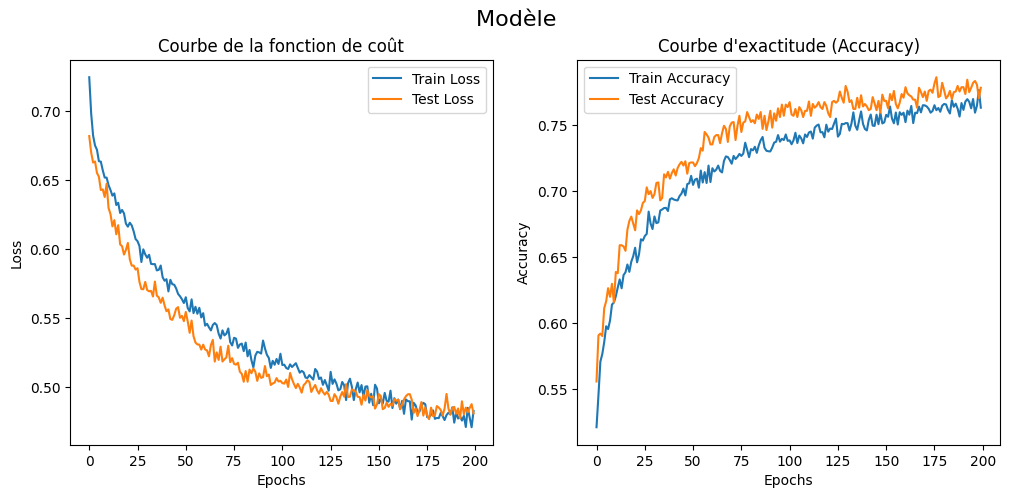

In [23]:
# Affichage des courbes d'apprentissage pour le modèle
plot_history(history_with_batchnorm, title="Modèle ")

### Analyse des Courbes : BatchNormalization vs Dropout

#### 1. Courbe de la Fonction de Coût (Loss)
- Les courbes **Train Loss** et **Test Loss** diminuent progressivement et restent proches.
- Peu de fluctuations dans la **Test Loss**, montrant une bonne généralisation.
- **BatchNormalization** stabilise les activations, assurant une cohérence entre l’entraînement et la validation.

#### 2. Courbe d'Exactitude (Accuracy)
- Les courbes **Train Accuracy** et **Test Accuracy** augmentent régulièrement.
- Pas de surapprentissage : les deux courbes restent proches.
- Des courbes lisses indiquent un apprentissage stable et des gradients bien gérés.

---
1. **Proximité des courbes** : BatchNormalization garde les courbes proches, tandis que Dropout peut causer des oscillations en validation.
2. **Stabilité** : BatchNormalization réduit les fluctuations, contrairement au bruit ajouté par Dropout.
3. **Convergence rapide** : BatchNormalization permet une perte qui diminue plus rapidement.
4. **Prévention du surapprentissage** : BatchNormalization stabilise les gradients sans sacrifier la précision comme le fait Dropout.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prédictions sur les données de test
y_test_pred = (model_with_batchnorm.predict(X_test) > 0.5).astype(int)

# Évaluer l'accuracy sur l'ensemble de test
accuracy_test = accuracy_score(y_randomn['spot_id_delta'] > 0, y_test_pred)
print("Accuracy sur les données de test :", accuracy_test)



155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
Accuracy sur les données de test : 0.6193848644273573


## Passant au LSTM 

**Préparation des données pour LSTM  Transformation des données en séquences pour LSTM**

In [24]:
import numpy as np

# Définition du nombre de timesteps pour LSTM
timesteps = 24

# Fonction pour transformer les données en séquences pour le LSTM
def reshape_for_lstm(X, y, timesteps):
    X_lstm = []
    y_lstm = []
    for i in range(len(X) - timesteps):
        X_lstm.append(X[i:i + timesteps])  
        y_lstm.append(y[i + timesteps])    
    return np.array(X_lstm), np.array(y_lstm)

# Préparer les données d'entraînement et de validation pour le LSTM
X_train_lstm, y_train_lstm = reshape_for_lstm(X_train_scaled, y_train_split.values, timesteps)
X_val_lstm, y_val_lstm = reshape_for_lstm(X_val_scaled, y_val_split.values, timesteps)

# Vérification des dimensions après transformation
print("X_train_lstm shape:", X_train_lstm.shape)
print("y_train_lstm shape:", y_train_lstm.shape)
print("X_val_lstm shape:", X_val_lstm.shape)
print("y_val_lstm shape:", y_val_lstm.shape)


X_train_lstm shape: (8460, 24, 11)
y_train_lstm shape: (8460,)
X_val_lstm shape: (2097, 24, 11)
y_val_lstm shape: (2097,)


### Objectif de la Transformation
La fonction `reshape_for_lstm` prépare les données pour un modèle **LSTM**, qui attend des séquences en entrée.  
Chaque séquence contient **24 pas de temps** (timesteps) pour prédire une seule sortie (**y**).

---

### Dimensions des Données
- **X_train_lstm** : `(8460, 24, 11)`  
  -> 8460 séquences, chacune avec **24 pas de temps** et **11 caractéristiques**.  
- **y_train_lstm** : `(8460,)`  
  -> Chaque séquence correspond à **un seul label**.  
- Les dimensions pour l’ensemble de validation sont similaires.

---

### Ce que cela signifie
Le modèle LSTM utilise des entrées au format **(n_samples, timesteps, n_features)**.  
C’est bien pour analyser les relations temporelles dans les données et faire des prédictions basées sur des séquences.


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Modèle LSTM de base
def create_lstm_model(input_shape):
    model = Sequential()
    
    # Première couche LSTM
    model.add(LSTM(128, input_shape=(input_shape[1], input_shape[2]), return_sequences=True))
    model.add(Dropout(0.2))  # Dropout pour éviter l'overfitting
    
    # Deuxième couche LSTM
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
    
    # Couche de sortie pour la classification binaire
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid pour des sorties entre 0 et 1
    
    return model

# Initialiser le modèle
model_lstm = create_lstm_model(X_train_lstm.shape)

# Compilation du modèle
model_lstm.compile(optimizer=Adam(learning_rate=0.001), 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])

# Entraîner le modèle
history_lstm = model_lstm.fit(
    X_train_lstm, y_train_lstm, 
    epochs=50,  # Nombre d'époques
    validation_data=(X_val_lstm, y_val_lstm), 
    batch_size=32  # Taille du batch
)

# Résumé du modèle
model_lstm.summary()

# Évaluation finale sur les données de validation
loss, accuracy = model_lstm.evaluate(X_val_lstm, y_val_lstm)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5104 - loss: 0.6943 - val_accuracy: 0.4993 - val_loss: 0.6939
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5073 - loss: 0.6939 - val_accuracy: 0.5136 - val_loss: 0.6942
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5226 - loss: 0.6928 - val_accuracy: 0.5203 - val_loss: 0.6923
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5090 - loss: 0.6932 - val_accuracy: 0.5083 - val_loss: 0.6933
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5263 - loss: 0.6917 - val_accuracy: 0.5069 - val_loss: 0.6930
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5316 - loss: 0.6918 - val_accuracy: 0.5107 - val_loss: 0.6924
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5197 - loss: 0.6912 - val_accuracy: 0.5236 - val_loss: 0.6940
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5399 - loss: 0.6887 - val_accu

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 24, 128)        │        71,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,461 (1.39 MB)

 Trainable params: 121,153 (473.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,308 (946.52 KB)

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4771 - loss: 2.5578
Validation Loss: 2.5883939266204834
Validation Accuracy: 0.4926084876060486


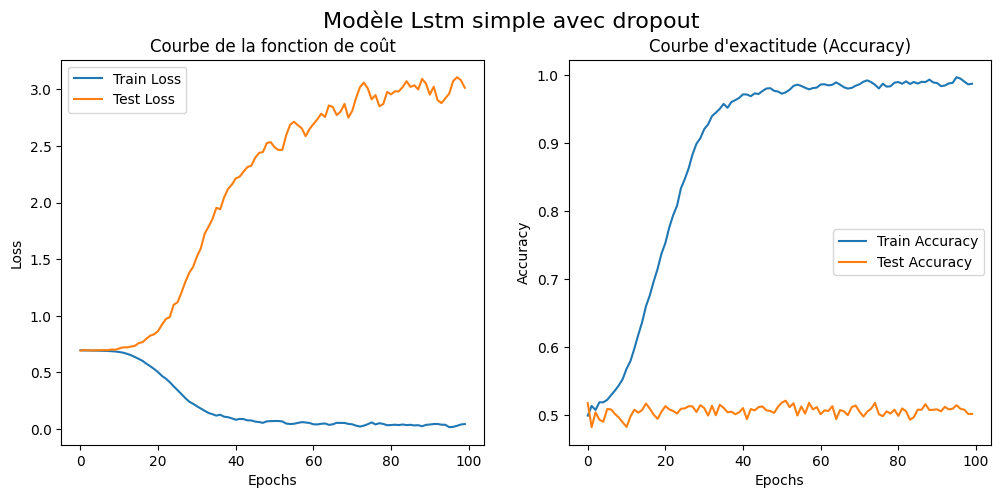

In [62]:
# Affichage des courbes d'apprentissage pour le modèle
plot_history(history_lstm, title="Modèle Lstm simple avec dropout")

### Résumé des résultats

#### Fonction de coût (Loss)
- **Entraînement** : Diminue bien, atteignant ~0.1, signe que le modèle mémorise les données d'entraînement.
- **Validation** : Augmente après 20 époques, indiquant un **surapprentissage**.

#### Exactitude (Accuracy)
- **Entraînement** : Atteint presque 100%, montrant une mémorisation parfaite.
- **Validation** : Reste autour de 50%, révélant une incapacité à généraliser.

Le modèle surapprend fortement. Le Dropout seul ne suffit pas à améliorer la généralisation.


### **Étape 1 : Augmentation des données avec fenêtre glissante afin d eviter le surapprentissage** 


Nous utilisons augment_with_sliding_window pour créer plus d'exemples en utilisant des fenêtres glissantes avec stride=1.

In [115]:
import numpy as np

# Fonction pour augmenter les données avec une fenêtre glissante
def augment_with_sliding_window(X, y, timesteps, stride=1):
    X_augmented = []
    y_augmented = []
    for i in range(0, len(X) - timesteps, stride):
        X_augmented.append(X[i:i + timesteps])
        y_augmented.append(y[i + timesteps])
    return np.array(X_augmented), np.array(y_augmented)

# Augmenter les données d'entraînement
timesteps = 24
X_train_aug, y_train_aug = augment_with_sliding_window(X_train_scaled, y_train_split.values, timesteps, stride=1)

# Vérifier les dimensions des données augmentées
print("Forme des données augmentées :", X_train_aug.shape, y_train_aug.shape)


Forme des données augmentées : (8460, 24, 11) (8460,)


#### Modèle LSTM avec régularisation L2 et Dropout supplémentaire et Reduction de nombre de neurones 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Modèle LSTM avec régularisation L2 et Dropout
def create_lstm_model_with_regularization(input_shape):
    model = Sequential()
    # Première couche LSTM avec régularisation L2
    model.add(LSTM(64, input_shape=(input_shape[0], input_shape[1]), 
                   return_sequences=True, kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))  # Dropout augmenté

    # Deuxième couche LSTM avec régularisation L2
    model.add(LSTM(64, return_sequences=False, kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))  # Dropout augmenté

    # Couche Dense avec régularisation L2
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

    return model

# Créer le modèle
model_lstm = create_lstm_model_with_regularization(X_train_aug.shape[1:])

# Compiler le modèle avec un taux d'apprentissage réduit
model_lstm.compile(optimizer=Adam(learning_rate=0.0005), 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])

# Résumé du modèle
model_lstm.summary()


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 24, 128)        │        71,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_122 (Dropout)           │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_123 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_179 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,153 (473.25 KB)

 Trainable params: 121,153 (473.25 KB)

 Non-trainable params: 0 (0.00 B)

#### **Ajouter des callbacks pour l'entraînement**
a. Callback ReduceLROnPlateau
Réduit dynamiquement le learning rate lorsque la validation stagne.

b. Callback EarlyStopping
Arrête l'entraînement si la perte de validation cesse de diminuer.

In [65]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Callback pour réduire le learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Callback pour arrêt précoce
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Entraîner le modèle
history = model_lstm.fit(
    X_train_aug, y_train_aug, 
    validation_data=(X_val_lstm, y_val_lstm), 
    epochs=50, 
    batch_size=32, 
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5062 - loss: 1.7357 - val_accuracy: 0.5064 - val_loss: 0.7397 - learning_rate: 5.0000e-04
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5006 - loss: 0.7158 - val_accuracy: 0.5079 - val_loss: 0.6947 - learning_rate: 5.0000e-04
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5022 - loss: 0.6942 - val_accuracy: 0.5079 - val_loss: 0.6934 - learning_rate: 5.0000e-04
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4929 - loss: 0.6934 - val_accuracy: 0.4921 - val_loss: 0.6932 - learning_rate: 5.0000e-04
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5060 - loss: 0.6932 - val_accuracy: 0.4921 - val_loss: 0.6932 - learning_rate: 5.0000e-04
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4909 - loss: 0.6932 - val_accuracy: 0.4921 - val_loss: 0.6932 - learning_rate: 5.0000e-04
Epoch 7/50
263/265 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc

### LSTM avec Validation Croisée

Dans cette section, nous allons entraîner un modèle LSTM en utilisant une validation croisée pour évaluer ses performances de manière plus robuste et détecter d'éventuels problèmes de surapprentissage ou de sous-apprentissage.


In [93]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

import numpy as np

# Nombre de timesteps pour le LSTM
timesteps = 24

# Fonction pour transformer les données en séquences pour le LSTM
def reshape_for_lstm(X, y, timesteps):
    X_lstm = []
    y_lstm = []
    for i in range(len(X) - timesteps):
        X_lstm.append(X[i:i + timesteps])  
        y_lstm.append(y[i + timesteps])    
    return np.array(X_lstm), np.array(y_lstm)

# Validation croisée KFold (séquentielle pour LSTM)
kf = KFold(n_splits=5, shuffle=False)  # shuffle=False pour respecter l'ordre temporel
fold_no = 1
accuracies = []

# Modèle LSTM de base
def create_lstm_model(input_shape):
    model = Sequential()
    
    # Première couche LSTM
    model.add(LSTM(128, input_shape=(input_shape[1], input_shape[2]), return_sequences=True))
    model.add(Dropout(0.2))  # Dropout pour éviter l'overfitting
    
    # Deuxième couche LSTM
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
    
    # Couche de sortie pour la classification binaire
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid pour des sorties entre 0 et 1
    
    return model


for train_index, val_index in kf.split(X_train_scaled):
    print(f"Fold {fold_no}")
    
    # Diviser les données d'entraînement et de validation
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train_split.values[train_index], y_train_split.values[val_index]
    
    # Transformer les données pour le LSTM
    X_train_lstm, y_train_lstm = reshape_for_lstm(X_train_fold, y_train_fold, timesteps)
    X_val_lstm, y_val_lstm = reshape_for_lstm(X_val_fold, y_val_fold, timesteps)
    
    # Créer un nouveau modèle pour chaque fold
    model_lstm = create_lstm_model(X_train_lstm.shape)
    
    # Compiler le modèle
    model_lstm.compile(optimizer=Adam(learning_rate=0.001), 
                       loss='binary_crossentropy', 
                       metrics=['accuracy'])
    
    
    # Entraîner le modèle
    history = model_lstm.fit(
        X_train_lstm, y_train_lstm,
        validation_data=(X_val_lstm, y_val_lstm),
        epochs=50,
        batch_size=32,
        verbose=1,
    )
    
    # Évaluer le modèle sur les données de validation
    loss, accuracy = model_lstm.evaluate(X_val_lstm, y_val_lstm, verbose=0)
    print(f"Fold {fold_no} - Validation Loss: {loss}, Validation Accuracy: {accuracy}")
    accuracies.append(accuracy)
    
    fold_no += 1

# Résultats finaux
print("Précisions pour chaque fold :", accuracies)
print("Moyenne des précisions sur les 5 folds :", np.mean(accuracies))


Fold 1
Epoch 1/50


c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


212/212 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4997 - loss: 0.6956 - val_accuracy: 0.4919 - val_loss: 0.6958
Epoch 2/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5098 - loss: 0.6935 - val_accuracy: 0.5218 - val_loss: 0.6937
Epoch 3/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5257 - loss: 0.6930 - val_accuracy: 0.4949 - val_loss: 0.6944
Epoch 4/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5095 - loss: 0.6926 - val_accuracy: 0.4991 - val_loss: 0.6945
Epoch 5/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5240 - loss: 0.6916 - val_accuracy: 0.5003 - val_loss: 0.6962
Epoch 6/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5312 - loss: 0.6912 - val_accuracy: 0.5069 - val_loss: 0.6940
Epoch 7/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5307 - loss: 0.6902 - val_accuracy: 0.5182 - val_loss: 0.6975
Epoch 8/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5444 - loss: 0.6857 - val_accuracy: 0.509


## Résumé des performances :
- **Précisions par fold** :
  - Fold 1 : 51.52%
  - Fold 2 : 47.46%
  - Fold 3 : 49.97%
  - Fold 4 : 48.54%
  - Fold 5 : 49.82%
- **Moyenne des précisions sur 5 folds** : **49.46%**

1. **Sous-performance générale** :
   - Les résultats montrent une précision moyenne autour de 49-51%, ce qui est proche d'une prédiction aléatoire pour un problème binaire. Cela indique que le modèle a du mal à apprendre des patterns significatifs dans les données.

2. **Impact des hyperparamètres** :
   - Même avec des techniques comme le Dropout et la régularisation L2, le modèle ne parvient pas à améliorer significativement la précision sur les données de validation. Un ajustement plus fin des hyperparamètres ou l'essai de nouvelles architectures pourrait être nécessaire.


**Test avec Sliding Window (timesteps) qui Permet de traiter des séquences plus courtes, réduisant la complexité.**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import Adam
# Ajouter des callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Créer un modèle amélioré
def create_improved_lstm(input_shape):
    model = Sequential()

    # Première couche LSTM avec BatchNorm
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True, 
                   kernel_initializer=HeNormal()))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Deuxième couche LSTM
    model.add(LSTM(64, return_sequences=False, kernel_initializer=HeNormal()))
    model.add(Dropout(0.4))

    # Couche Dense avec régularisation L2
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

    return model

# Réduire les timesteps à 48 ou 72 ensuite régénérer les données
timesteps = 48
X_train_aug, y_train_aug = augment_with_sliding_window(X_train_scaled, y_train_split.values, timesteps)
X_val_aug, y_val_aug = augment_with_sliding_window(X_val_scaled, y_val_split.values, timesteps)

# Initialiser le modèle
model = create_improved_lstm(X_train_aug.shape[1:])

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.0003), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])



reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Entraîner le modèle
history = model.fit(
    X_train_aug, y_train_aug, 
    validation_data=(X_val_aug, y_val_aug), 
    epochs=50, 
    batch_size=32, 
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5150 - loss: 0.7575 - val_accuracy: 0.4916 - val_loss: 0.7278 - learning_rate: 3.0000e-04
Epoch 2/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5222 - loss: 0.7338 - val_accuracy: 0.4925 - val_loss: 0.7240 - learning_rate: 3.0000e-04
Epoch 3/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5271 - loss: 0.7186 - val_accuracy: 0.4891 - val_loss: 0.7206 - learning_rate: 3.0000e-04
Epoch 4/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5424 - loss: 0.7084 - val_accuracy: 0.4969 - val_loss: 0.7184 - learning_rate: 3.0000e-04
Epoch 5/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5524 - loss: 0.6985 - val_accuracy: 0.4901 - val_loss: 0.7165 - learning_rate: 3.0000e-04
Epoch 6/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5738 - loss: 0.6864 - val_accuracy: 0.4863 - val_loss: 0.7152 - learning_rate: 3.0000e-04
Epoch 7/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - acc

**Test de fonction d activation Tanh car il est mieux adapté pour gérer les séquences avec des valeurs centrées autour de zéro. Cela peut être bénéfique pour les données temporelles.**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Créer un modèle LSTM avec activation tanh
def create_tanh_lstm(input_shape):
    model = Sequential()
    
    # Première couche LSTM avec tanh
    model.add(LSTM(128, activation='tanh', input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.3))
    
    # Deuxième couche LSTM avec tanh
    model.add(LSTM(64, activation='tanh', return_sequences=False))
    model.add(Dropout(0.3))
    
    # Couche Dense de sortie
    model.add(Dense(1, activation='sigmoid'))  # Pour classification binaire

    return model

# Initialiser le modèle
model_tanh = create_tanh_lstm(X_train_aug.shape[1:])

# Compiler le modèle avec un learning rate de 0.001
model_tanh.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])



# Entraîner le modèle
history_tanh = model_tanh.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_val_aug, y_val_aug),
    epochs=50,
    batch_size=32
)


Epoch 1/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.4935 - loss: 0.6965 - val_accuracy: 0.5287 - val_loss: 0.6921
Epoch 2/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - accuracy: 0.5170 - loss: 0.6934 - val_accuracy: 0.5094 - val_loss: 0.6936
Epoch 3/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.5168 - loss: 0.6929 - val_accuracy: 0.4838 - val_loss: 0.6964
Epoch 4/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.5186 - loss: 0.6929 - val_accuracy: 0.5263 - val_loss: 0.6924
Epoch 5/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - accuracy: 0.5193 - loss: 0.6916 - val_accuracy: 0.5142 - val_loss: 0.6936
Epoch 6/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.5215 - loss: 0.6923 - val_accuracy: 0.5118 - val_loss: 0.6932
Epoch 7/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.5216 - loss: 0.6923 - val_accuracy: 0.5133 - val_loss: 0.6933
Epoch 8/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.5264 - loss: 0.6916 - va

## Analyse des Performances Actuelles

- **Précision en entraînement** : Haute précision (95%), indiquant une bonne adaptation aux données d'entraînement, mais possiblement un surapprentissage.
- **Précision en validation** : Stagne à 48-52%, montrant une faible généralisation du modèle.
- **Perte en validation** : Augmente avec les époques, confirmant le surapprentissage.



## LSTM Bidirectionnel

Un LSTM bidirectionnel exploite les informations des séquences temporelles dans les deux directions : "avant" et "arrière", améliorant ainsi la compréhension contextuelle.


In [72]:
from tensorflow.keras.layers import Bidirectional

# Créer un modèle avec Bidirectional LSTM
def create_bidirectional_lstm(input_shape):
    model = Sequential()
    # Première couche LSTM bidirectionnelle
    model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(input_shape[0], input_shape[1])))
    model.add(Dropout(0.2))  # Dropout pour régularisation
    
    # Deuxième couche LSTM bidirectionnelle
    model.add(Bidirectional(LSTM(64, return_sequences=False)))
    model.add(Dropout(0.2))
    
    # Couche de sortie
    model.add(Dense(1, activation='sigmoid'))  # Classification binaire
    return model

# Initialiser le modèle
model_bi_lstm = create_bidirectional_lstm(X_train_aug.shape[1:])

# Compiler le modèle
model_bi_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history_bi_lstm = model_bi_lstm.fit(
    X_train_aug, y_train_aug, 
    epochs=50, 
    validation_data=(X_val_lstm, y_val_lstm), 
    batch_size=32
)

# Résumé du modèle
model_bi_lstm.summary()


Epoch 1/50


c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


265/265 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.5079 - loss: 0.6975 - val_accuracy: 0.4993 - val_loss: 0.6941
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5242 - loss: 0.6925 - val_accuracy: 0.5031 - val_loss: 0.6936
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5218 - loss: 0.6922 - val_accuracy: 0.5017 - val_loss: 0.6950
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5184 - loss: 0.6918 - val_accuracy: 0.4998 - val_loss: 0.6957
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5254 - loss: 0.6911 - val_accuracy: 0.4821 - val_loss: 0.6982
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.5420 - loss: 0.6883 - val_accuracy: 0.5126 - val_loss: 0.6983
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.5554 - loss: 0.6860 - val_accuracy: 0.5055 - val_loss: 0.6984
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.5691 - loss: 0.6817 - val_accuracy: 0.49

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 24, 256)        │       143,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_132 (Dropout)           │ (None, 24, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_133 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_186 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 923,525 (3.52 MB)

 Trainable params: 307,841 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 615,684 (2.35 MB)

## Architecture GRU

Test de l Arch de GRU (Gated Recurrent Units) qui est une variante simplifiée des LSTM. Avec moins de paramètres.

In [73]:
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Définir le modèle GRU
def create_gru_model(input_shape):
    model = Sequential()
    # Première couche GRU avec return_sequences=True pour empiler d'autres couches
    model.add(GRU(128, input_shape=(input_shape[0], input_shape[1]), return_sequences=True))
    model.add(Dropout(0.2))
    # Deuxième couche GRU
    model.add(GRU(64, return_sequences=False))
    model.add(Dropout(0.2))
    # Couche Dense pour la sortie
    model.add(Dense(1, activation='sigmoid'))  # Activation sigmoid pour la classification binaire
    return model

# Initialiser et compiler le modèle
model_gru = create_gru_model(X_train_aug.shape[1:])
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history_gru = model_gru.fit(
    X_train_aug, y_train_aug, 
    epochs=50, 
    validation_data=(X_val_lstm, y_val_lstm), 
    batch_size=32
)

# Résumé du modèle
model_gru.summary()


Epoch 1/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5059 - loss: 0.6967 - val_accuracy: 0.4988 - val_loss: 0.6970
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5020 - loss: 0.6958 - val_accuracy: 0.5098 - val_loss: 0.6929
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5109 - loss: 0.6947 - val_accuracy: 0.5160 - val_loss: 0.6944
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.5149 - loss: 0.6927 - val_accuracy: 0.4993 - val_loss: 0.6949
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.5282 - loss: 0.6916 - val_accuracy: 0.5179 - val_loss: 0.6916
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.5285 - loss: 0.6905 - val_accuracy: 0.5174 - val_loss: 0.6933
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.5429 - loss: 0.6888 - val_accuracy: 0.5198 - val_loss: 0.6917
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.5453 - loss: 0.6869 - val_accu

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 24, 128)        │        54,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_134 (Dropout)           │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_135 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_187 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 274,373 (1.05 MB)

 Trainable params: 91,457 (357.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 182,916 (714.52 KB)

In [126]:
import numpy as np
import pandas as pd

# Convertir X_test et y_randomn en numpy si nécessaire
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.values
if isinstance(y_randomn, (pd.Series, pd.DataFrame)):
    y_randomn = y_randomn.values

# Vérifier la taille
if len(y_randomn) < len(X_test):
    raise ValueError("y_randomn est trop court pour correspondre à X_test.")

# Reshape pour LSTM
def reshape_for_lstm(X, y, timesteps):
    X_lstm = []
    y_lstm = []
    for i in range(len(X) - timesteps):
        X_lstm.append(X[i:i + timesteps])
        if i + timesteps < len(y):  # Limitez l'accès à y
            y_lstm.append(y[i + timesteps])
    return np.array(X_lstm), np.array(y_lstm)

# Appliquer reshape_for_lstm
X_test_lstm, y_test_lstm = reshape_for_lstm(X_test, y_randomn, timesteps)

# Vérification des dimensions
print("X_test_lstm shape:", X_test_lstm.shape)
print("y_test_lstm shape:", y_test_lstm.shape)


X_test_lstm shape: (4918, 24, 11)
y_test_lstm shape: (4918, 2)


In [127]:
# Prédire sur l'ensemble de test
y_pred = model_gru.predict(X_test_lstm)

# Convertir les probabilités en classes binaires (0 ou 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Afficher les résultats
print("Prédictions (probabilités) :", y_pred[:10].flatten())  # Afficher les 10 premières prédictions
print("Prédictions (classes) :", y_pred_classes[:10].flatten())  # Afficher les 10 premières classes


154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Prédictions (probabilités) : [0.00281847 0.00400558 0.0033141  0.00360739 0.00372767 0.00295024
 0.00449236 0.00377138 0.00398799 0.00382175]
Prédictions (classes) : [0 0 0 0 0 0 0 0 0 0]


In [129]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Vérifiez si y_randomn est un tableau NumPy et convertissez-le en DataFrame si nécessaire
if isinstance(y_randomn, np.ndarray):
    y_randomn = pd.DataFrame(y_randomn, columns=['DELIVERY_START', 'spot_id_delta'])

# Affichez les colonnes disponibles
print("Colonnes disponibles dans y_randomn :", y_randomn.columns)

# Filtrer uniquement la colonne 'spot_id_delta'
y_randomn = y_randomn[['spot_id_delta']]

# Convertir la colonne 'spot_id_delta' en binaire pour la classification
y_randomn_binary = (y_randomn['spot_id_delta'] > 0).astype(int)

# Vérification des dimensions
print("Forme de y_randomn_binary :", y_randomn_binary.shape)

# Normalisation des données X_test
X_test_scaled = scaler.transform(X_test)

# Reshape pour le LSTM
def reshape_for_lstm(X, y, timesteps):
    X_lstm = []
    y_lstm = []
    for i in range(len(X) - timesteps):
        X_lstm.append(X[i:i + timesteps])
        if i + timesteps < len(y):
            y_lstm.append(y[i + timesteps])
    return np.array(X_lstm), np.array(y_lstm)

# Transformation des données de test
timesteps = 24
X_test_lstm, y_test_lstm = reshape_for_lstm(X_test_scaled, y_randomn_binary.values, timesteps)

print("Forme de X_test_lstm :", X_test_lstm.shape)
print("Forme de y_test_lstm :", y_test_lstm.shape)

# Prédire sur l'ensemble de test
y_pred = model_gru.predict(X_test_lstm)

# Convertir les probabilités en classes binaires
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculer l'accuracy
accuracy = accuracy_score(y_test_lstm, y_pred_classes)
print(f"Accuracy sur l'ensemble de test : {accuracy * 100:.2f}%")

# Afficher quelques résultats
print("Prédictions (probabilités) :", y_pred[:10].flatten())
print("Prédictions (classes) :", y_pred_classes[:10].flatten())


Colonnes disponibles dans y_randomn : Index(['DELIVERY_START', 'spot_id_delta'], dtype='object')
Forme de y_randomn_binary : (4942,)
Forme de X_test_lstm : (4918, 24, 11)
Forme de y_test_lstm : (4918,)
 25/154 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

c:\Users\yassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy sur l'ensemble de test : 50.98%
Prédictions (probabilités) : [0.0405871  0.99167585 0.7681148  0.9795714  0.10036461 0.05950914
 0.13811058 0.03141151 0.01903381 0.00805458]
Prédictions (classes) : [0 1 1 1 0 0 0 0 0 0]


## Transformers :

### **Préparation des Données**
#### **Entrées séquentielles ==>** les données d'entrée (features) sont organisées dans une séquence (ex : par heure ou jour).
Cible : Vue qu on  fait une classification (ex : positif ou négatif pour spot_id_delta), transformations de la cible en valeurs binaires.

In [46]:
timesteps = 24 # Longueur de séquence

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Normalisez les données d'entraînement
X_test_scaled = scaler.transform(X_test)       # Normalisez les données de test

# Ajuster X_train_scaled
valid_size_train = (X_train_scaled.shape[0] // timesteps) * timesteps
X_train_scaled = X_train_scaled[:valid_size_train]
X_train_seq = np.reshape(X_train_scaled, (-1, timesteps, X_train_scaled.shape[1]))

# Ajuster X_test_scaled
valid_size_test = (X_test_scaled.shape[0] // timesteps) * timesteps
X_test_scaled = X_test_scaled[:valid_size_test]
X_test_seq = np.reshape(X_test_scaled, (-1, timesteps, X_test_scaled.shape[1]))

print("Forme de X_train_seq :", X_train_seq.shape)
print("Forme de X_test_seq :", X_test_seq.shape)


Forme de X_train_seq : (441, 24, 11)
Forme de X_test_seq : (205, 24, 11)


In [ ]:
# Transformer la cible en binairE
y_train_binary = (y_train['spot_id_delta'] > 0).astype(int).values
y_test_binary = (y_randomn['spot_id_delta'] > 0).astype(int).values


In [38]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, MultiHeadAttention, LayerNormalization, Add

def transformer_encoder(input_shape, num_heads, ff_dim, dropout_rate=0.1):
    inputs = Input(shape=input_shape)
    
    # Self-Attention Layer
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=input_shape[-1])(inputs, inputs)
    attention_output = Dropout(dropout_rate)(attention_output)
    attention_output = Add()([inputs, attention_output])
    attention_output = LayerNormalization(epsilon=1e-6)(attention_output)
    
    # Feed-Forward Network
    ff_output = Dense(ff_dim, activation='relu')(attention_output)
    ff_output = Dense(input_shape[-1])(ff_output)
    ff_output = Dropout(dropout_rate)(ff_output)
    outputs = Add()([attention_output, ff_output])
    outputs = LayerNormalization(epsilon=1e-6)(outputs)
    
    return Model(inputs, outputs)

# Paramètres du modèle
input_shape = (timesteps, X_train_scaled.shape[1])
num_heads = 4
ff_dim = 64

# Construire l'Encoder
encoder = transformer_encoder(input_shape, num_heads, ff_dim)


### Transformer Encoder 


Le **Transformer Encoder** que j ai utilse, est une architecture avancée pour capturer les relations globales dans des séquences temporelles. Voici ses composants clés :

1. **Entrée** : Forme `(timesteps, features)`, représentant une séquence avec des pas temporels et des variables associées.

2. **Self-Attention (MultiHeadAttention)** : Apprend les relations importantes entre les éléments de la séquence.

3. **Skip Connection + Layer Normalization** : Conserve les informations d'origine et stabilise l'entraînement.

4. **Feed-Forward Network** : Transforme les données avec deux couches `Dense` (activation `relu`).

5. **Dropout** : Réduit le surapprentissage.

### Paramètres principaux
- **num_heads** : Têtes d'attention pour capturer diverses relations.
- **ff_dim** : Taille du réseau dense.



Definition du Modele du Transfermers !! 

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling1D

# Construire un nouveau modèle
model = Sequential([
    encoder,  # Encoder défini précédemment
    GlobalAveragePooling1D(),       # Réduit les 24 sorties en une seule moyenne
    Dense(64, activation='relu'),   # Couche entièrement connectée
    Dropout(0.2),                   # Dropout pour régularisation
    Dense(1, activation='sigmoid')  # Sortie binaire unique
])

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_11 (Functional)      │ (None, 48, 11)         │         3,606 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 11)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,439 (17.34 KB)

 Trainable params: 4,439 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Ajuster les données cibles pour correspondre au format séquentiel
y_train_binary_seq = y_train_binary[:X_train_seq.shape[0]]
y_test_binary_seq = y_test_binary[:X_test_seq.shape[0]]

# Vérifier les formes
print("Forme de y_train_binary_seq :", y_train_binary_seq.shape)
print("Forme de y_test_binary_seq :", y_test_binary_seq.shape)


Forme de y_train_binary_seq : (220,)
Forme de y_test_binary_seq : (102,)


In [45]:
history = model.fit(
    X_train_seq, y_train_binary_seq,  # Données d'entraînement
    validation_data=(X_test_seq, y_test_binary_seq),  # Données de validation
    epochs=60,
    batch_size=32
)


Epoch 1/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.4804 - val_loss: 3.6654
Epoch 2/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.4902 - val_loss: 3.6724
Epoch 3/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 8.7812e-04 - val_accuracy: 0.4804 - val_loss: 3.6744
Epoch 4/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.4804 - val_loss: 3.6822
Epoch 5/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.4804 - val_loss: 3.6858
Epoch 6/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.4804 - val_loss: 3.6927
Epoch 7/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.4902 - val_loss: 3.7018
Epoch 8/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.4902 - val_loss: 3.7072
Epo

#### **Test avec Normalisation Avancée et Encodage Temporel sinusoïdaux (sin, cos) pour capturer les cycles horaires et hebdomadaires** 

In [47]:
import numpy as np

# Fonction pour ajouter un encodage temporel sinusoïdal
def add_temporal_encoding(df):
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
    return df

# Appliquer l'encodage à X_train et X_test
X_train_encoded = add_temporal_encoding(X_train)
X_test_encoded = add_temporal_encoding(X_test)

# Supprimer les colonnes originales 'hour' et 'day_of_week' (si vous le souhaitez)
X_train_encoded = X_train_encoded.drop(columns=['hour', 'day_of_week'])
X_test_encoded = X_test_encoded.drop(columns=['hour', 'day_of_week'])

# Vérification des nouvelles colonnes ajoutées
print(X_train_encoded.head())


   load_forecast  coal_power_available  gas_power_available  \
0        49439.0                3386.0              11487.0   
1        46511.0                3386.0              11487.0   
2        45158.0                3386.0              11487.0   
3        44779.0                3386.0              11487.0   
4        45284.0                3386.0              11487.0   

   nucelear_power_available  wind_power_forecasts_average  \
0                   44118.0                        3035.0   
1                   44118.0                        3143.0   
2                   44118.0                        3288.0   
3                   44118.0                        3447.0   
4                   44118.0                        3679.0   

   solar_power_forecasts_average  wind_power_forecasts_std  \
0                            0.0                 79.248348   
1                            0.0                 61.776532   
2                            0.0                 44.291112   
3     

**Normalisation des Donnees encodees avec standarScaler**

In [48]:
from sklearn.preprocessing import StandardScaler

# Normalisation des données d'entraînement et de test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Convertir en DataFrame pour une meilleure visualisation
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns)

print("Données normalisées avec succès. Aperçu des données normalisées :")
print(X_train_scaled.head())


Données normalisées avec succès. Aperçu des données normalisées :
   load_forecast  coal_power_available  gas_power_available  \
0      -0.383373              1.143747             0.049151   
1      -0.659986              1.143747             0.049151   
2      -0.787806              1.143747             0.049151   
3      -0.823611              1.143747             0.049151   
4      -0.775902              1.143747             0.049151   

   nucelear_power_available  wind_power_forecasts_average  \
0                  1.145139                     -0.440917   
1                  1.145139                     -0.408639   
2                  1.145139                     -0.365304   
3                  1.145139                     -0.317783   
4                  1.145139                     -0.248446   

   solar_power_forecasts_average  wind_power_forecasts_std  \
0                      -0.708029                 -0.348940   
1                      -0.708029                 -0.481292   
2 

In [ ]:
# Définir la longueur des séquences (par exemple, 24 heures)
timesteps = 24

# Ajuster X_train_scaled pour la taille des séquences
valid_size_train = (X_train_scaled.shape[0] // timesteps) * timesteps
X_train_scaled = X_train_scaled[:valid_size_train]  # tronque les données pour conserver uniquement un nombre divisible par 24
X_train_seq = np.reshape(X_train_scaled.values, (-1, timesteps, X_train_scaled.shape[1])) 

# Ajuster X_test_scaled pour la taille des séquences
valid_size_test = (X_test_scaled.shape[0] // timesteps) * timesteps
X_test_scaled = X_test_scaled[:valid_size_test]
X_test_seq = np.reshape(X_test_scaled.values, (-1, timesteps, X_test_scaled.shape[1]))

# Vérifier les formes des séquences
print("Forme de X_train_seq :", X_train_seq.shape)
print("Forme de X_test_seq :", X_test_seq.shape)


Forme de X_train_seq : (441, 24, 13)
Forme de X_test_seq : (205, 24, 13)


In [50]:
# Reformater y_train et y_test pour correspondre aux séquences
y_train_binary = (y_train['spot_id_delta'] > 0).astype(int).values
y_test_binary = (y_randomn['spot_id_delta'] > 0).astype(int).values

# Ajuster les cibles
y_train_binary_seq = y_train_binary[:X_train_seq.shape[0]]
y_test_binary_seq = y_test_binary[:X_test_seq.shape[0]]

# Vérifiez les formes des cibles
print("Forme de y_train_binary_seq :", y_train_binary_seq.shape)
print("Forme de y_test_binary_seq :", y_test_binary_seq.shape)


Forme de y_train_binary_seq : (441,)
Forme de y_test_binary_seq : (205,)


In [51]:
# Vérifiez un échantillon des séquences et des cibles
print("Exemple de séquence (X_train_seq) :", X_train_seq[0])
print("Exemple de cible (y_train_binary_seq) :", y_train_binary_seq[:5])


Exemple de séquence (X_train_seq) : [[-3.83373416e-01  1.14374668e+00  4.91512351e-02  1.14513932e+00
  -4.40917302e-01 -7.08029225e-01 -3.48939897e-01 -5.79593186e-01
  -1.28727230e+00  7.08870269e-01  1.22576830e+00 -1.37722983e+00
  -3.32777846e-01]
 [-6.59985967e-01  1.14374668e+00  4.91512351e-02  1.14513932e+00
  -4.08639475e-01 -7.08029225e-01 -4.81292291e-01 -5.79593186e-01
  -1.28727230e+00  1.00172258e+00  1.00099155e+00 -1.37722983e+00
  -3.32777846e-01]
 [-7.87805906e-01  1.14374668e+00  4.91512351e-02  1.14513932e+00
  -3.65303504e-01 -7.08029225e-01 -6.13747732e-01 -5.79593186e-01
  -1.28727230e+00  1.22643606e+00  7.08056790e-01 -1.37722983e+00
  -3.32777846e-01]
 [-8.23610605e-01  1.14374668e+00  4.91512351e-02  1.14513932e+00
  -3.17783370e-01 -7.08029225e-01 -6.75588009e-01 -5.79593186e-01
  -1.28727230e+00  1.36769685e+00  3.66927035e-01 -1.37722983e+00
  -3.32777846e-01]
 [-7.75902497e-01  1.14374668e+00  4.91512351e-02  1.14513932e+00
  -2.48445816e-01 -7.08029225e

In [53]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, MultiHeadAttention, LayerNormalization, Add, GlobalAveragePooling1D
from tensorflow.keras.regularizers import l2

def transformer_encoder(input_shape, num_heads, ff_dim, dropout_rate=0.2):
    inputs = Input(shape=input_shape)
    
    # Self-Attention Layer
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=input_shape[-1])(inputs, inputs)
    attention_output = Dropout(dropout_rate)(attention_output)
    attention_output = Add()([inputs, attention_output])
    attention_output = LayerNormalization(epsilon=1e-6)(attention_output)
    
    # Feed-Forward Network
    ff_output = Dense(ff_dim, activation='relu', kernel_regularizer=l2(0.01))(attention_output)
    ff_output = Dense(input_shape[-1])(ff_output)
    ff_output = Dropout(dropout_rate)(ff_output)
    outputs = Add()([attention_output, ff_output])
    outputs = LayerNormalization(epsilon=1e-6)(outputs)
    
    return Model(inputs, outputs)

# Paramètres du modèle
input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])
num_heads = 4
ff_dim = 64

# Construire l'Encoder
encoder = transformer_encoder(input_shape, num_heads, ff_dim)

# Construire le modèle complet
model = Sequential([
    encoder,                      # Transformer Encoder
    GlobalAveragePooling1D(),     # Réduit les séquences en une moyenne
    Dense(64, activation='relu'), # Couche dense intermédiaire
    Dropout(0.3),                 # Dropout pour régularisation
    Dense(1, activation='sigmoid') # Couche de sortie binaire
])

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_13 (Functional)      │ (None, 24, 13)         │         4,666 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 13)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,627 (21.98 KB)

 Trainable params: 5,627 (21.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4155 - loss: 0.9495 - val_accuracy: 0.5073 - val_loss: 0.8908
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5206 - loss: 0.8717 - val_accuracy: 0.5756 - val_loss: 0.8709
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5778 - loss: 0.8335 - val_accuracy: 0.5561 - val_loss: 0.8562
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5803 - loss: 0.8242 - val_accuracy: 0.5561 - val_loss: 0.8407
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5750 - loss: 0.8031 - val_accuracy: 0.5220 - val_loss: 0.8287
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6115 - loss: 0.7603 - val_accuracy: 0.5024 - val_loss: 0.8194
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6216 - loss: 0.7484 - val_accuracy: 0.4976 - val_loss: 0.8117
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6326 - loss: 0.7215 - val_accuracy: 0.4976 - val_loss

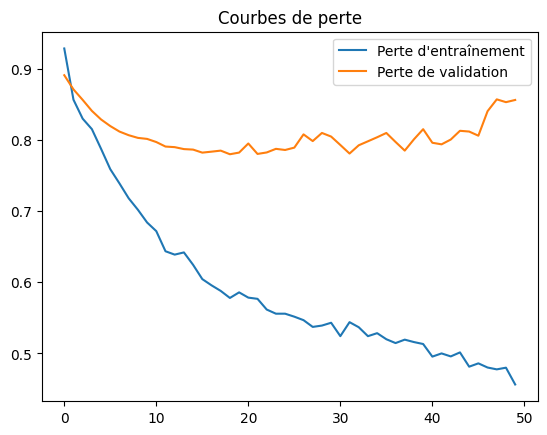

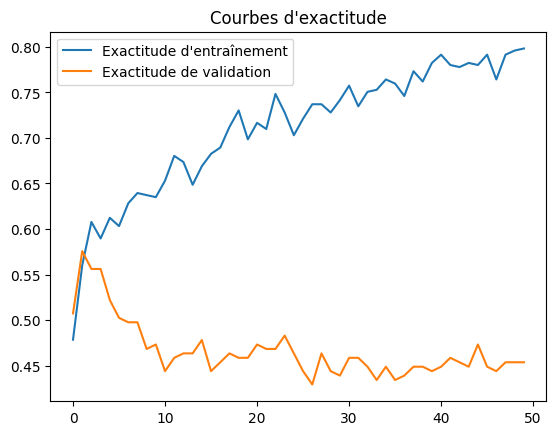

In [54]:
# Entraîner le modèle
history = model.fit(
    X_train_seq, y_train_binary_seq,  # Données d'entraînement
    validation_data=(X_test_seq, y_test_binary_seq),  # Données de validation
    epochs=50,  # Nombre d'époques
    batch_size=32,  # Taille des lots
    verbose=1
)

# Affichage des courbes d'apprentissage
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title("Courbes de perte")
plt.show()

plt.plot(history.history['accuracy'], label='Exactitude d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Exactitude de validation')
plt.legend()
plt.title("Courbes d'exactitude")
plt.show()


### Analyse des performances du modèle

- **Exactitude d'entraînement** :  
  Le modèle atteint rapidement environ **80 %**, ce qui indique qu'il s'ajuste bien aux données d'entraînement.

- **Exactitude de validation** :  
  Elle reste autour de **45-50 %**, montrant que le modèle peine à généraliser sur des données inconnues.
  

- **Perte d'entraînement** :  
  Une diminution régulière est observée, atteignant environ **0.47**, ce qui est un bon signe d'apprentissage.

- **Perte de validation** :  
  Elle reste élevée, autour de **0.85**, ce qui suggère que le modèle a des difficultés à bien généraliser.
